# Case Study of a Shopping Mall in Dubai

**Visualization and analysis of simulated building energy data**

* One of the biggest shopping mall of the world
* Located in United Arab Emirates (i.e. arid climate)
* Floor area is about 500,000 m2
* Number of visitors every year is around 90 million
* Building with tremendously high cooling energy demand

We will begin with visualizing some EnergyPlus simulation model data.

In [249]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

## Monthly Energy Visulization
Lets look at the energy consumption per month:
* The baseline data contains data from simulation model with conventional design options.

In [2]:
base_data = pd.read_csv('./simulation_data/Baseline.csv', index_col='Month')

In [3]:
base_data.head()

Baseline
Month             
January       5.69
February      6.75
March        10.64
April        13.60
May          19.34

<Axes: xlabel='Month'>

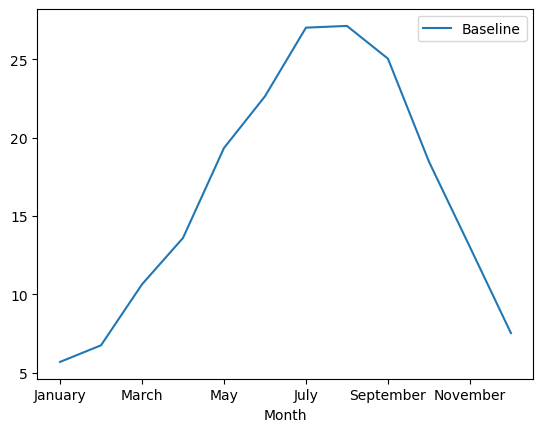

In [4]:
base_data.plot()

<Axes: title={'center': 'Cooling Energy Consumption of Baseline Building in Total GWh'}, xlabel='Month'>

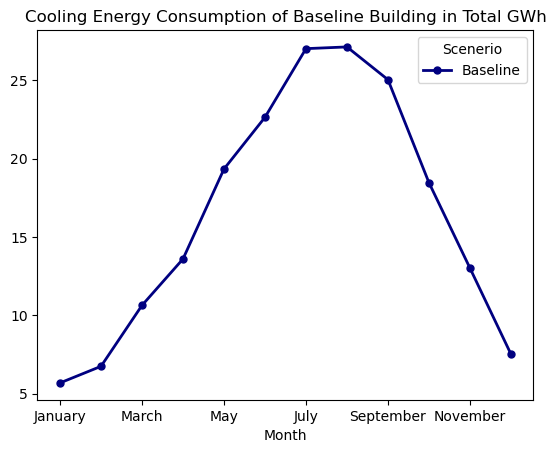

In [5]:
base_data.columns.name='Scenerio'
base_data.plot(lw=2, colormap='jet', marker='.', markersize=10, 
        title='Cooling Energy Consumption of Baseline Building in Total GWh')

## Different Design Options Scenerio
Baseline vs Different scheduling
* First let's take a look at one of the design options - the use of optimized schedules. Instead of the building operating 24/7, the building would have the cooling system on only during operating hours.

In [6]:
Aircon = pd.read_csv("./simulation_data/Scenario - Aircon Schedules.csv", index_col="Month")

In [7]:
Aircon

Scenario - Aircon Schedules
Month                                 
January                           5.61
February                          6.50
March                             9.70
April                            11.95
May                              16.52
June                             18.89
July                             22.13
August                           22.14
September                        20.38
October                          15.87
November                         11.71
December                          7.16

In [8]:
base_data

Scenerio   Baseline
Month              
January        5.69
February       6.75
March         10.64
April         13.60
May           19.34
June          22.64
July          27.02
August        27.13
September     25.04
October       18.47
November      13.02
December       7.53

Combine both the dataset

In [9]:
combined_data = pd.concat([base_data, Aircon], axis=1)

In [10]:
combined_data

Baseline  Scenario - Aircon Schedules
Month                                           
January        5.69                         5.61
February       6.75                         6.50
March         10.64                         9.70
April         13.60                        11.95
May           19.34                        16.52
June          22.64                        18.89
July          27.02                        22.13
August        27.13                        22.14
September     25.04                        20.38
October       18.47                        15.87
November      13.02                        11.71
December       7.53                         7.16

<Axes: title={'center': 'Cooling Energy Consumption of Base Model in Total Gwh'}, xlabel='Month'>

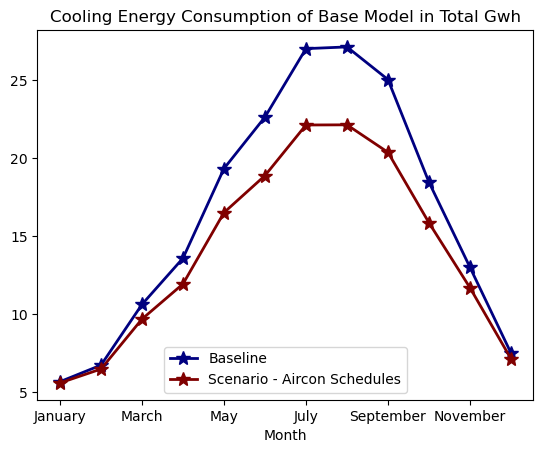

In [11]:
combined_data.plot(lw=2, colormap='jet', marker="*", markersize=10,
                  title="Cooling Energy Consumption of Base Model in Total Gwh")

In [12]:
combined_data['Difference'] = combined_data['Baseline'] - combined_data['Scenario - Aircon Schedules']

In [13]:
combined_data

Baseline  Scenario - Aircon Schedules  Difference
Month                                                       
January        5.69                         5.61        0.08
February       6.75                         6.50        0.25
March         10.64                         9.70        0.94
April         13.60                        11.95        1.65
May           19.34                        16.52        2.82
June          22.64                        18.89        3.75
July          27.02                        22.13        4.89
August        27.13                        22.14        4.99
September     25.04                        20.38        4.66
October       18.47                        15.87        2.60
November      13.02                        11.71        1.31
December       7.53                         7.16        0.37

<Axes: title={'center': 'Differene between base Schedule and Improved schedule in Total GWh'}, xlabel='Month'>

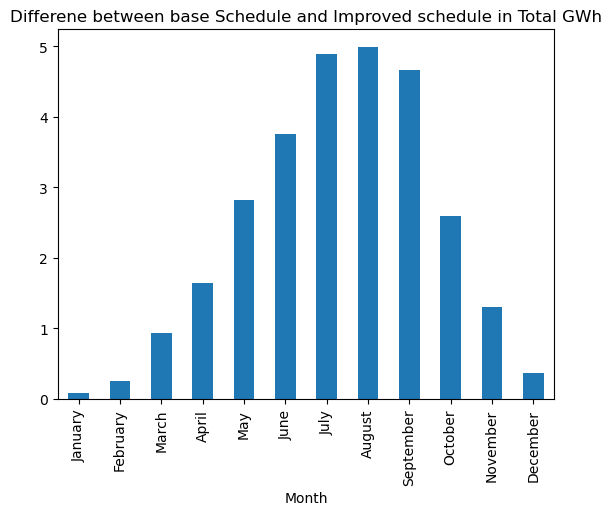

In [14]:
combined_data['Difference'].plot.bar(title='Differene between base Schedule and Improved schedule in Total GWh')

## Comparing all of the options
* Glazing
* Rooftop gardens
* Thermal Comfort
* Cool paiting on the roof

In [15]:
list_of_files = ['Scenario - Aircon Schedules.csv',
 'Scenario - Cool roof.csv',
 'Scenario - Rooftop Gardens.csv',
 'Scenario - Increase Setpoint.csv',
 'Scenario - Low-E Glass.csv',
 'Baseline.csv']

In [16]:
data_container = []
for file_name in list_of_files:
    df = pd.read_csv("./simulation_data/" + file_name, index_col='Month')
    data_container.append(df)
    
merged = pd.concat(data_container, axis=1)

In [17]:
merged

Scenario - Aircon Schedules  Scenario - Cool roof  \
Month                                                          
January                           5.61                  4.46   
February                          6.50                  5.39   
March                             9.70                  8.96   
April                            11.95                 11.73   
May                              16.52                 17.28   
June                             18.89                 20.54   
July                             22.13                 24.76   
August                           22.14                 24.97   
September                        20.38                 22.98   
October                          15.87                 16.57   
November                         11.71                 11.41   
December                          7.16                  6.36   

           Scenario - Rooftop Gardens  Scenario - Increase Setpoint  \
Month                                                                 
January                          6.30                          2.73   
February                         7.15                          3.88   
March                           10.90                          6.60   
April                           13.59                          9.37   
May                             18.94                         14.82   
June                            22.12                         18.01   
July                            26.29                         21.98   
August                          26.47                         22.15   
September                       24.63                         19.92   
October                         18.51                         13.65   
November                        13.55                          8.49   
December                         8.19                          4.15   

           Scenario - Low-E Glass  Baseline  
Month                                        
January                      5.41      5.69  
February                     6.48      6.75  
March                       10.37     10.64  
April                       13.36     13.60  
May                         19.14     19.34  
June                        22.47     22.64  
July                        26.84     27.02  
August                      26.91     27.13  
September                   24.77     25.04  
October                     18.16     18.47  
November                    12.69     13.02  
December                     7.24      7.53

In [18]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, January to December
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Scenario - Aircon Schedules   12 non-null     float64
 1   Scenario - Cool roof          12 non-null     float64
 2   Scenario - Rooftop Gardens    12 non-null     float64
 3   Scenario - Increase Setpoint  12 non-null     float64
 4   Scenario - Low-E Glass        12 non-null     float64
 5   Baseline                      12 non-null     float64
dtypes: float64(6)
memory usage: 672.0+ bytes


<Axes: title={'center': 'Cooling Energy Consumption of Baseline Building in Total GWh'}, xlabel='Month'>

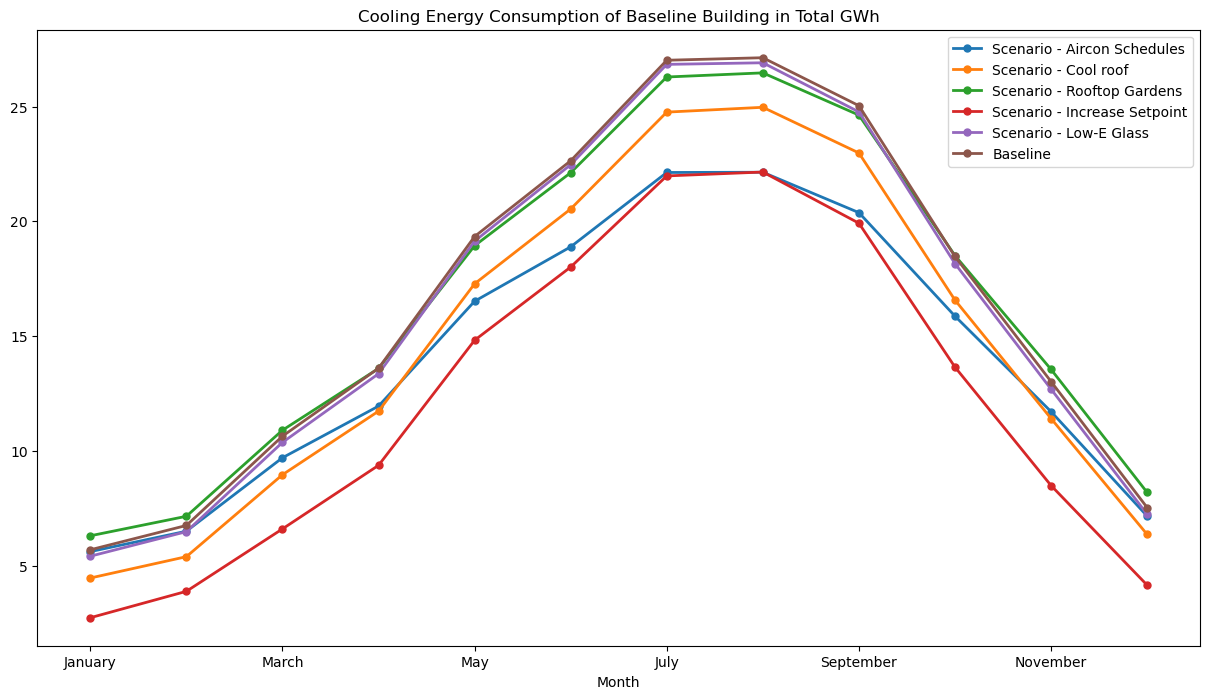

In [19]:
merged.plot(lw=2, marker='.', markersize=10, 
        title='Cooling Energy Consumption of Baseline Building in Total GWh', figsize=(15,8))

Lets see the total energy consumption reduction from each design options

In [20]:
merged

Scenario - Aircon Schedules  Scenario - Cool roof  \
Month                                                          
January                           5.61                  4.46   
February                          6.50                  5.39   
March                             9.70                  8.96   
April                            11.95                 11.73   
May                              16.52                 17.28   
June                             18.89                 20.54   
July                             22.13                 24.76   
August                           22.14                 24.97   
September                        20.38                 22.98   
October                          15.87                 16.57   
November                         11.71                 11.41   
December                          7.16                  6.36   

           Scenario - Rooftop Gardens  Scenario - Increase Setpoint  \
Month                                                                 
January                          6.30                          2.73   
February                         7.15                          3.88   
March                           10.90                          6.60   
April                           13.59                          9.37   
May                             18.94                         14.82   
June                            22.12                         18.01   
July                            26.29                         21.98   
August                          26.47                         22.15   
September                       24.63                         19.92   
October                         18.51                         13.65   
November                        13.55                          8.49   
December                         8.19                          4.15   

           Scenario - Low-E Glass  Baseline  
Month                                        
January                      5.41      5.69  
February                     6.48      6.75  
March                       10.37     10.64  
April                       13.36     13.60  
May                         19.14     19.34  
June                        22.47     22.64  
July                        26.84     27.02  
August                      26.91     27.13  
September                   24.77     25.04  
October                     18.16     18.47  
November                    12.69     13.02  
December                     7.24      7.53

<Axes: >

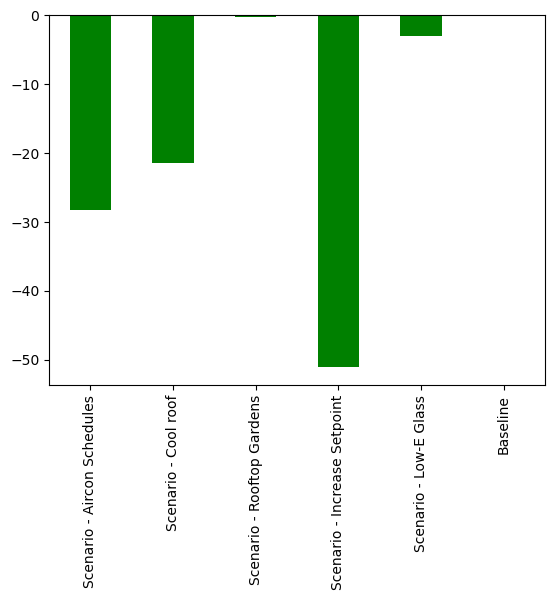

In [21]:
merged.subtract(merged['Baseline'], axis=0).sum().plot.bar(color='green')

# Time Series Data Analysis - Meter Data Analysis

For this section, we will be using the Building Data Genome Project:

https://github.com/buds-lab/the-building-data-genome-project

![alt text](https://raw.githubusercontent.com/buds-lab/the-building-data-genome-project/master/figures/buildingdatagenome1.png)

* This project is a set of 500+ time-series meter data from buildings -- check out the website which includes an overview of the data set, sources, and publications that use the data set. 

* we will use some of the buildings from that data set to understand why Pandas was designed for time-series data from IoT networks


Let's load the data from a single building for the meter_data folder- building name is Amelia

In [22]:
amelia = pd.read_csv('./meter_data/Office_Amelia.csv', index_col='timestamp')

In [23]:
amelia.head()

Office_Amelia
timestamp                         
2015-01-01 00:00:00           3.96
2015-01-01 01:00:00           4.44
2015-01-01 02:00:00           4.82
2015-01-01 03:00:00           4.28
2015-01-01 04:00:00          18.79

In [24]:
amelia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8760 entries, 2015-01-01 00:00:00 to 2015-12-31 23:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Office_Amelia  8760 non-null   float64
dtypes: float64(1)
memory usage: 136.9+ KB


In [25]:
amelia.index[0]

'2015-01-01 00:00:00'

### Convert  timestamp index to a datetime object

In [26]:
amelia = pd.read_csv('./meter_data/Office_Amelia.csv', index_col='timestamp', parse_dates=True)

In [27]:
amelia.head()

Office_Amelia
timestamp                         
2015-01-01 00:00:00           3.96
2015-01-01 01:00:00           4.44
2015-01-01 02:00:00           4.82
2015-01-01 03:00:00           4.28
2015-01-01 04:00:00          18.79

In [28]:
amelia.index[0]

Timestamp('2015-01-01 00:00:00')

Timestamp is the pandas equivalent of python's Datetime

### Plot Simple Charts of time-series data

<Axes: xlabel='timestamp'>

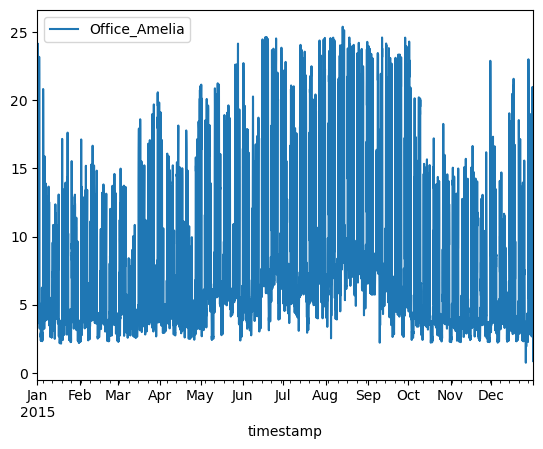

In [29]:
amelia.plot()

<Axes: xlabel='timestamp'>

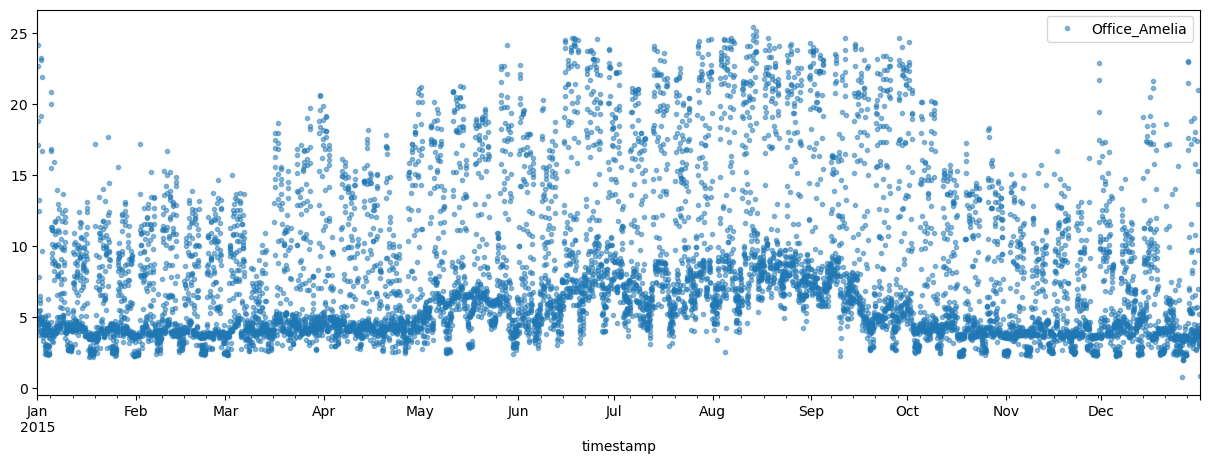

In [30]:
amelia.plot(marker=".", linestyle='None', alpha=0.5, figsize=(15, 5))

### Resample the data

Two types of resampling are: 
* Upsampling: Where you increase the frequency of the samples, such as from minutes to seconds. 
* Downsampling: Where you decrease the frequency of the samples, such as from days to months.

* We will focus here on downsampling, exploring how it can help us analyze our OPSD data on various time scales



In [31]:
amelia.head()

Office_Amelia
timestamp                         
2015-01-01 00:00:00           3.96
2015-01-01 01:00:00           4.44
2015-01-01 02:00:00           4.82
2015-01-01 03:00:00           4.28
2015-01-01 04:00:00          18.79

In [32]:
amelia_daily = amelia.resample("D").mean(numeric_only=True)

In [33]:
amelia_daily.head()

Office_Amelia
timestamp                
2015-01-01       8.323750
2015-01-02       7.865417
2015-01-03       3.695417
2015-01-04       3.680417
2015-01-05       8.948333

<Axes: xlabel='timestamp'>

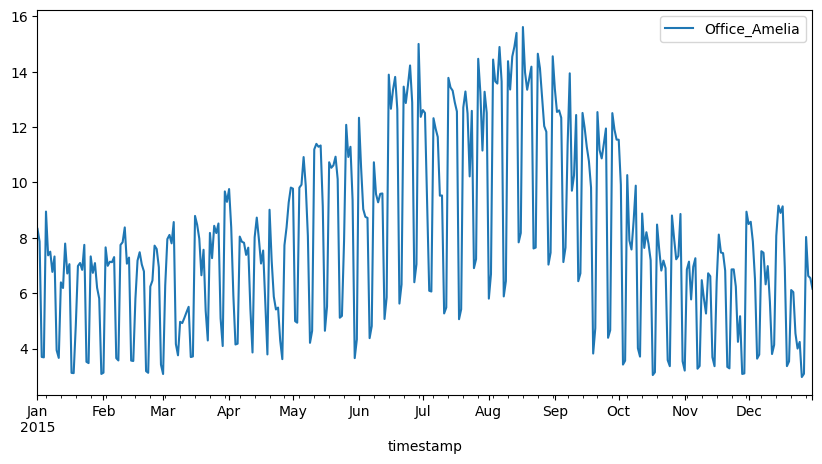

In [34]:
amelia_daily.plot(figsize=(10, 5))

<Axes: xlabel='timestamp'>

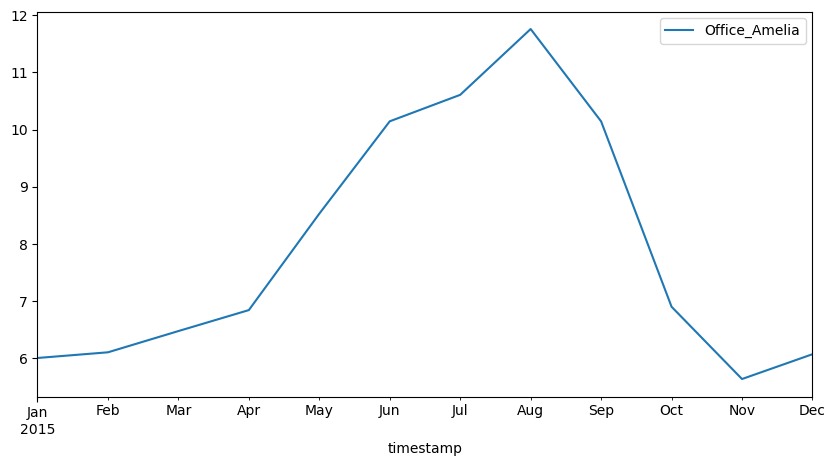

In [35]:
amelia_daily.resample('M').mean().plot(figsize=(10, 5))

### Analysis of a large number of buildings at once
we will select few for the building from the dataset

In [36]:
list_of_buildings = [
    'UnivClass_Andy.csv',
    'Office_Alannah.csv',
    'PrimClass_Angel.csv',
    'Office_Penny.csv',
    'UnivLab_Allison.csv',
    'Office_Amelia.csv',
    'UnivClass_Alfredo.csv',
    'Office_Phebian.csv',
    'UnivLab_Adrian.csv',
    'UnivDorm_Curtis.csv',
    'UnivLab_Angie.csv',
    'UnivClass_Amya.csv',
    'UnivLab_Audra.csv',
]

In [37]:
data_container_list = []
for building_name in list_of_buildings:
    df = pd.read_csv("./meter_data/" + building_name, index_col='timestamp', parse_dates=True)
    df = df.resample("D").mean()
    data_container_list.append(df)
all_merged = pd.concat(data_container_list, axis=1)

array([<Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>], dtype=object)

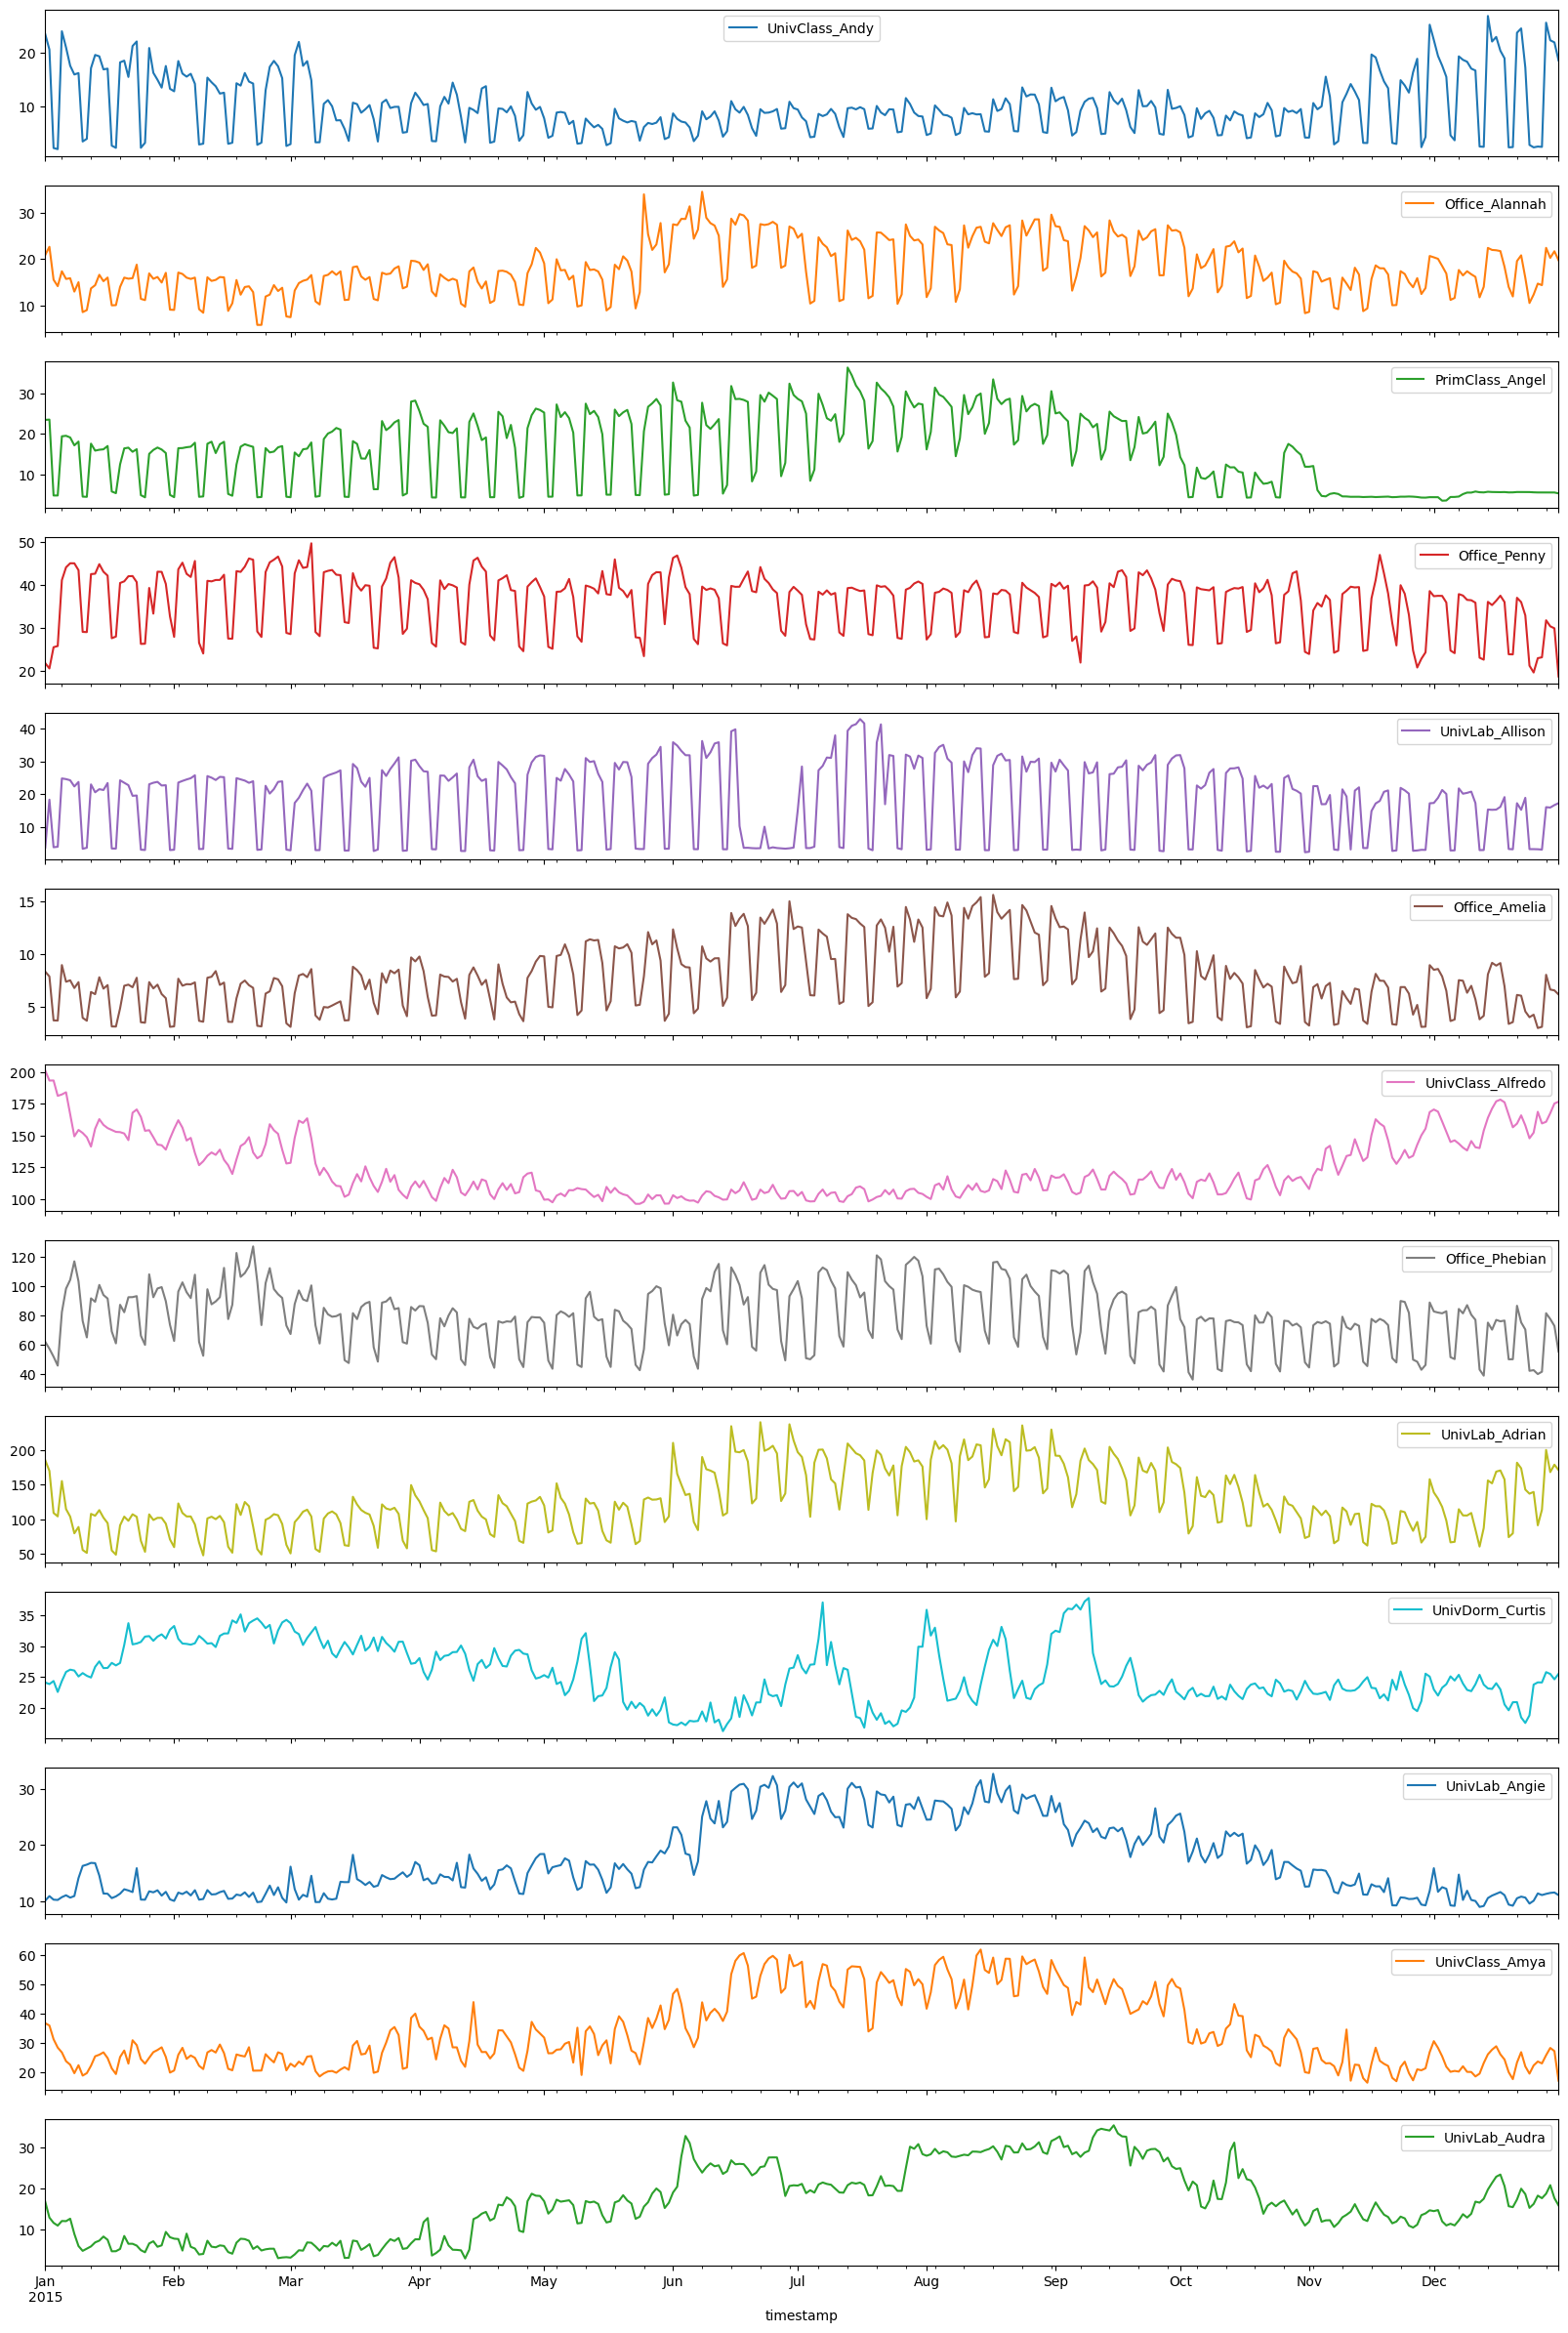

In [38]:
all_merged.plot(figsize=(20, 30), subplots=True)

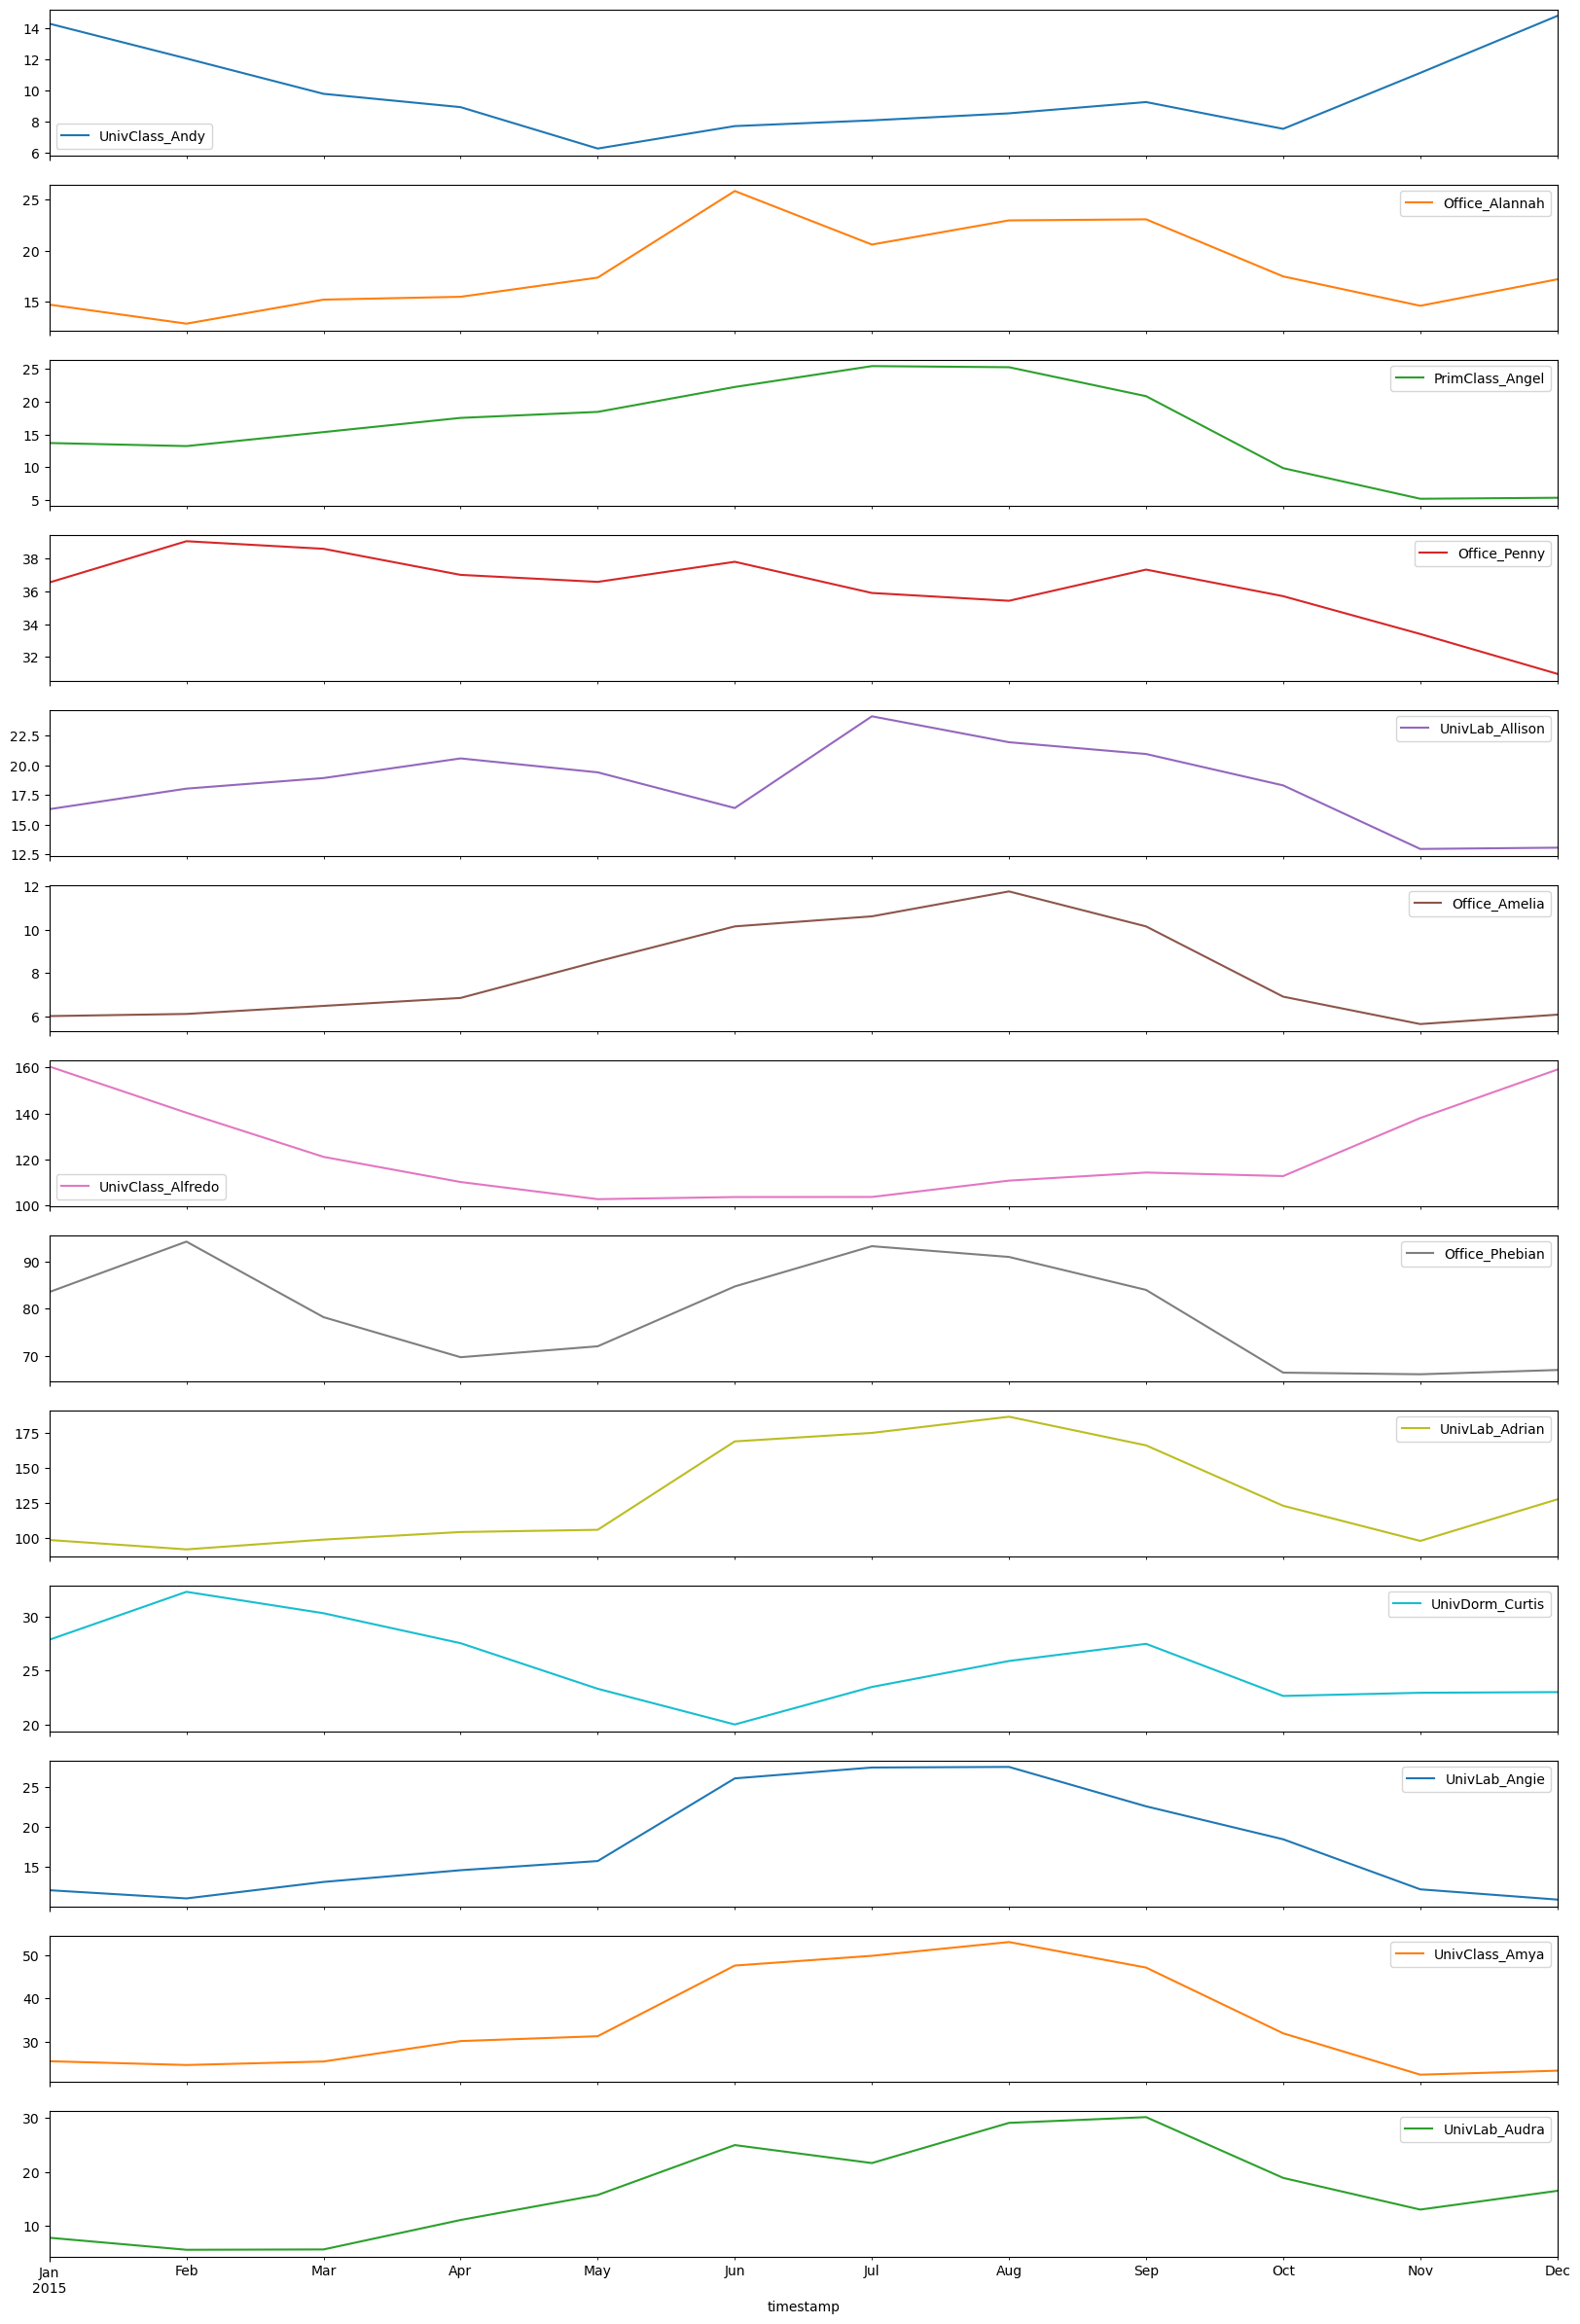

In [39]:
all_merged.resample("M").mean().plot(figsize=(20,30), subplots=True);

# Compare consumption of buildings to be  each other

* Buildings come in all shapes, sizes and uses. It is difficult to compare the energy consumption of two buildings if they are not similar in these ways 
* So we will Normalize energy consumption data of buildings to be able to compare them to each other¶

In [40]:
# Here we will take different building
building_name = "Office_Penny"
raw_data = pd.read_csv("./meter_data/"+building_name+".csv", parse_dates=True, index_col='timestamp')

In [41]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2015-01-01 00:00:00 to 2015-12-31 23:00:00
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Office_Penny  8760 non-null   float64
dtypes: float64(1)
memory usage: 136.9 KB


<Axes: xlabel='timestamp'>

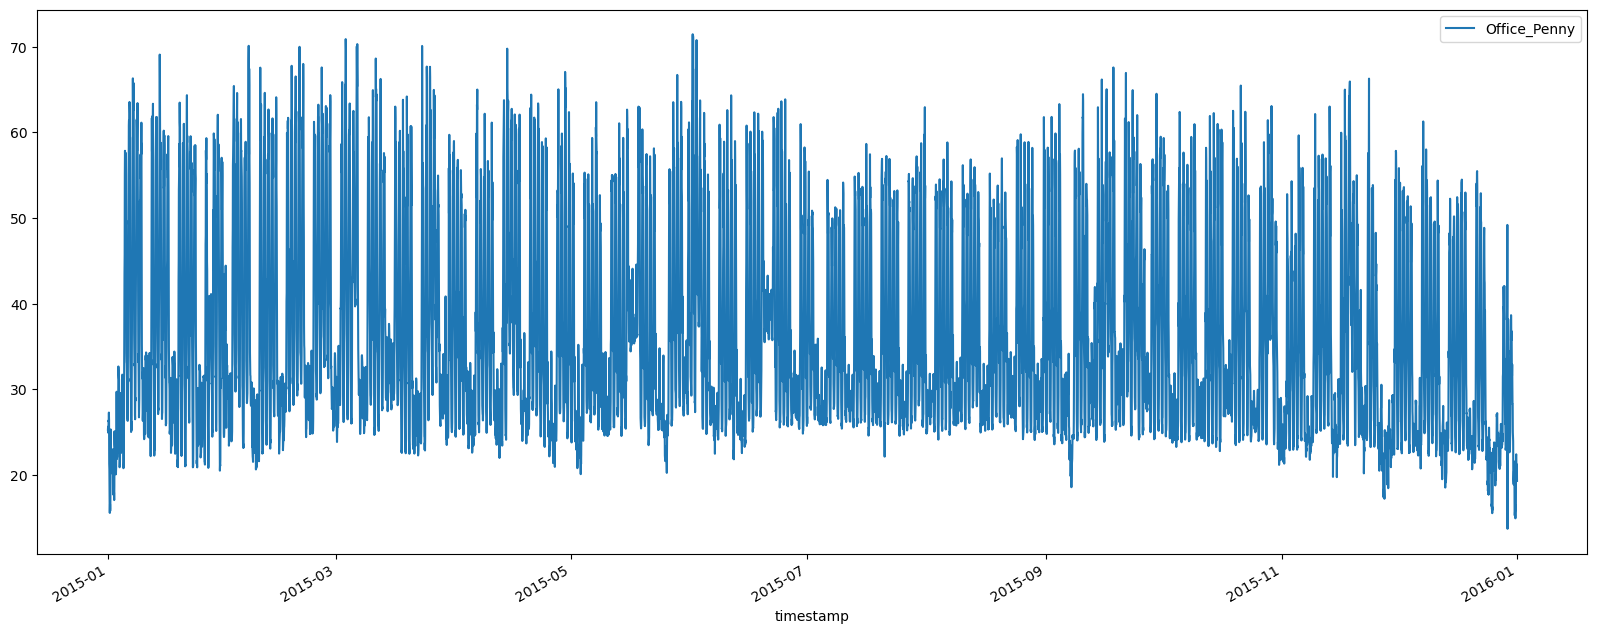

In [42]:
raw_data.plot(figsize=(20, 8))

### Normalize by floor area
* EUI - Energy Use Intensity - This metric takes energy and simply divides by the floor area (in ft2 or m2)

In [43]:
metadata = pd.read_csv('./all_buildings_meta_data.csv', index_col="uid")

In [44]:
metadata.head()

dataend       datastart  energystarscore  \
uid                                                                    
PrimClass_Everett    31/12/12 23:00  01/01/12 00:00              NaN   
UnivClass_Clifford   31/12/15 23:00  01/01/15 00:00              NaN   
Office_Elizabeth     31/12/12 23:00  01/01/12 00:00              NaN   
Office_Ellie         31/12/12 23:00  01/01/12 00:00              NaN   
PrimClass_Elisabeth  31/12/12 23:00  01/01/12 00:00              NaN   

                    heatingtype             industry mainheatingtype  \
uid                                                                    
PrimClass_Everett           NaN            Education             NaN   
UnivClass_Clifford          NaN            Education             NaN   
Office_Elizabeth            NaN  Commercial Property             NaN   
Office_Ellie                NaN  Commercial Property             NaN   
PrimClass_Elisabeth         NaN            Education             NaN   

                     numberoffloors  occupants            primaryspaceusage  \
uid                                                                           
PrimClass_Everett               NaN        NaN  Primary/Secondary Classroom   
UnivClass_Clifford              NaN        NaN            College Classroom   
Office_Elizabeth                NaN        NaN                       Office   
Office_Ellie                    NaN        NaN                       Office   
PrimClass_Elisabeth             NaN        NaN  Primary/Secondary Classroom   

                    rating      sqft           sqm               subindustry  \
uid                                                                            
PrimClass_Everett      NaN  105530.0   9804.053590  Primary/Secondary School   
UnivClass_Clifford     NaN   56969.0   5292.591007        College/University   
Office_Elizabeth       NaN  294651.0  27373.961850    Commercial Real Estate   
Office_Ellie           NaN  496517.0  46127.918850   Bank/Financial Services   
PrimClass_Elisabeth    NaN  233062.0  21652.158990  Primary/Secondary School   

                                timezone yearbuilt   nickname  \
uid                                                             
PrimClass_Everett       America/New_York       NaN    Everett   
UnivClass_Clifford      America/New_York      1967   Clifford   
Office_Elizabeth     America/Los_Angeles       NaN  Elizabeth   
Office_Ellie         America/Los_Angeles       NaN      Ellie   
PrimClass_Elisabeth     America/New_York       NaN  Elisabeth   

                    primaryspaceuse_abbrev newweatherfilename  
uid                                                            
PrimClass_Everett                PrimClass      weather12.csv  
UnivClass_Clifford               UnivClass       weather2.csv  
Office_Elizabeth                    Office      weather22.csv  
Office_Ellie                        Office      weather28.csv  
PrimClass_Elisabeth              PrimClass      weather23.csv

In [45]:
metadata.loc[building_name]

dataend                       31/12/15 23:00
datastart                     01/01/15 00:00
energystarscore                          NaN
heatingtype                              NaN
industry                           Education
mainheatingtype                          NaN
numberoffloors                           NaN
occupants                                NaN
primaryspaceusage                     Office
rating                                   NaN
sqft                                 37485.0
sqm                              3482.468955
subindustry               College/University
timezone                    America/New_York
yearbuilt                                NaN
nickname                               Penny
primaryspaceuse_abbrev                Office
newweatherfilename              weather4.csv
Name: Office_Penny, dtype: object

In [46]:
sqm = metadata.loc[building_name]["sqm"]
sqm

3482.468955

In [47]:
raw_data.head()

Office_Penny
timestamp                        
2015-01-01 00:00:00     25.275000
2015-01-01 01:00:00     25.625000
2015-01-01 02:00:00     25.158333
2015-01-01 03:00:00     24.900000
2015-01-01 04:00:00     26.358333

In [48]:
normazlied_rawdata = raw_data / sqm

In [49]:
normazlied_rawdata.head()

Office_Penny
timestamp                        
2015-01-01 00:00:00      0.007258
2015-01-01 01:00:00      0.007358
2015-01-01 02:00:00      0.007224
2015-01-01 03:00:00      0.007150
2015-01-01 04:00:00      0.007569

In [50]:
monthly_normalized = normazlied_rawdata.resample('M').sum()

Text(0, 0.5, 'Kwh/m2')

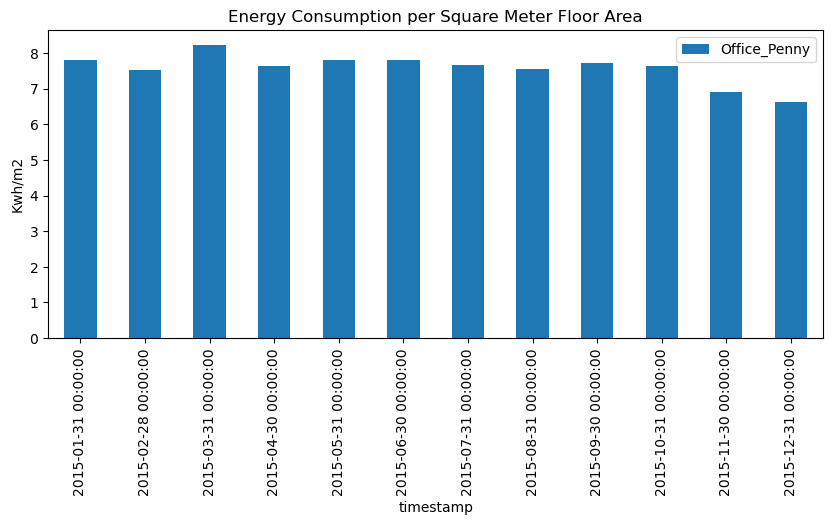

In [51]:
monthly_normalized.plot(kind="bar", figsize=(10,4), title='Energy Consumption per Square Meter Floor Area')
plt.ylabel("Kwh/m2")

### Analysis on multiple buildings¶

In [52]:
buildingnamelist = [
    "Office_Abbey",
    "Office_Pam",
    "Office_Penny",
    "UnivLab_Allison",
    "UnivLab_Audra",
    "UnivLab_Ciel"]

In [53]:
annual_data_list = []
annual_data_list_normalized = []

In [54]:
for buildingname in buildingnamelist:
    print("Getting data from: "+buildingname)
    
    rawdata = pd.read_csv("./meter_data/"+buildingname+".csv", parse_dates=True, index_col='timestamp')
    floor_area = metadata.loc[buildingname]["sqm"]
    
    annual = rawdata.sum()

    normalized_data = rawdata/floor_area
    annual_normalized = normalized_data.sum()
    
    annual_data_list_normalized.append(annual_normalized)
    annual_data_list.append(annual) 

Getting data from: Office_Abbey
Getting data from: Office_Pam
Getting data from: Office_Penny
Getting data from: UnivLab_Allison
Getting data from: UnivLab_Audra
Getting data from: UnivLab_Ciel


In [55]:
totaldata = pd.concat(annual_data_list)
totaldata_normalized = pd.concat(annual_data_list_normalized)

In [56]:
totaldata

Office_Abbey       4.500047e+05
Office_Pam         9.239849e+05
Office_Penny       3.167204e+05
UnivLab_Allison    1.614309e+05
UnivLab_Audra      1.466867e+05
UnivLab_Ciel       3.122984e+06
dtype: float64

In [57]:
totaldata_normalized

Office_Abbey        65.298087
Office_Pam          95.022257
Office_Penny        90.947091
UnivLab_Allison    370.575397
UnivLab_Audra      344.517297
UnivLab_Ciel       143.740305
dtype: float64

#### Unnormalized energy consumption
see from the annual totals of energy consumption, the Lab named Ciel uses a lot of energy as compared to the other buildings!

<Axes: >

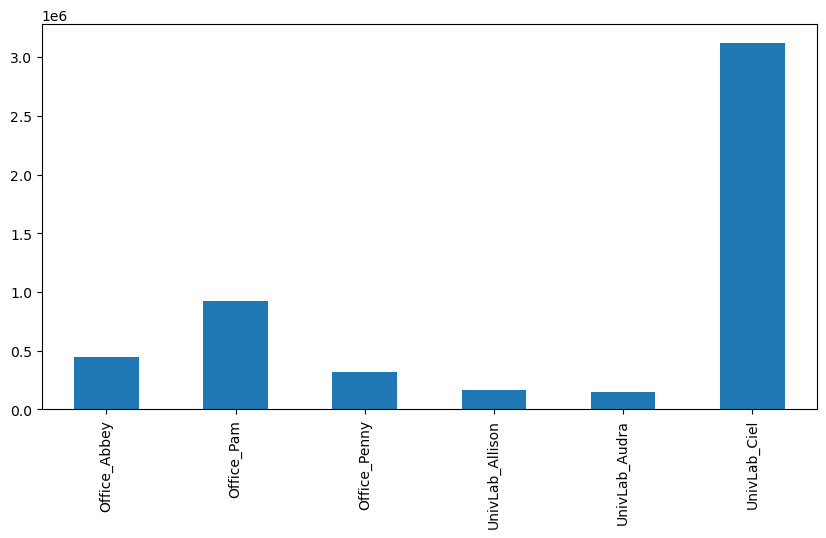

In [58]:
totaldata.plot(kind='bar',figsize=(10,5))

#### Normalized Energy Consumption
But, when normalized using floor area, Ciel is not the highest consumer

<Axes: >

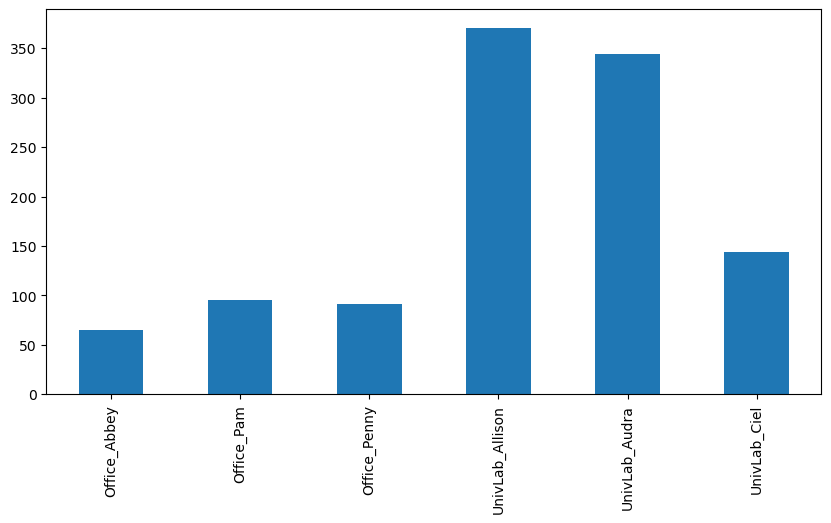

In [59]:
totaldata_normalized.plot(kind='bar',figsize=(10,5))

# Weather Influence on Energy Consumption

In [60]:
%matplotlib inline

In [61]:
ciara_rawdata = pd.read_csv("./meter_data/UnivClass_Ciara.csv", parse_dates=True, index_col='timestamp')

In [62]:
ciara_rawdata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2015-01-01 00:00:00 to 2015-12-31 23:00:00
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   UnivClass_Ciara  8760 non-null   float64
dtypes: float64(1)
memory usage: 136.9 KB


<Axes: xlabel='timestamp'>

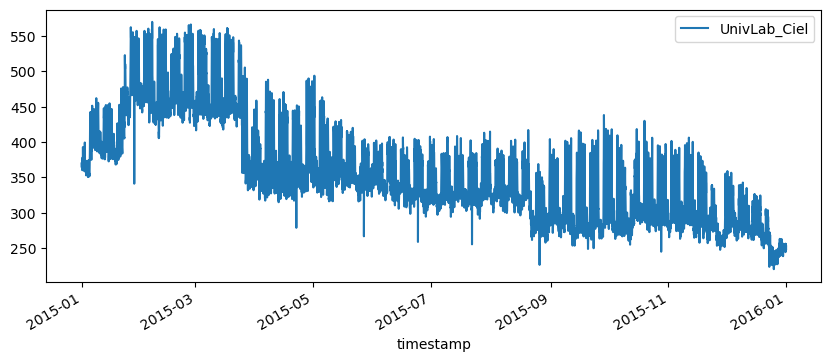

In [63]:
rawdata.plot(figsize=(10,4))

In [64]:
metadata.loc['UnivClass_Ciara']

dataend                       31/12/15 23:00
datastart                     01/01/15 00:00
energystarscore                          NaN
heatingtype                              NaN
industry                           Education
mainheatingtype                          NaN
numberoffloors                           NaN
occupants                                NaN
primaryspaceusage          College Classroom
rating                                   NaN
sqft                                140488.0
sqm                              13051.75666
subindustry               College/University
timezone                    America/New_York
yearbuilt                               1961
nickname                               Ciara
primaryspaceuse_abbrev             UnivClass
newweatherfilename              weather2.csv
Name: UnivClass_Ciara, dtype: object

For the university class building "UnivClass_Ciara" the weather data is weather2.csv as we can see from the meta data.

In [65]:
weather_data_ciara = pd.read_csv("./weather_data/weather2.csv", index_col='timestamp', parse_dates=True)

In [66]:
weather_data_ciara.head()

Conditions              DateUTC<br />  Dew PointC Events  \
timestamp                                                                      
2015-01-01 00:56:00   Overcast  2015-01-01 05:56:00<br />       -15.0    NaN   
2015-01-01 01:56:00   Overcast  2015-01-01 06:56:00<br />       -14.4    NaN   
2015-01-01 02:56:00   Overcast  2015-01-01 07:56:00<br />       -14.4    NaN   
2015-01-01 03:56:00   Overcast  2015-01-01 08:56:00<br />       -14.4    NaN   
2015-01-01 04:56:00   Overcast  2015-01-01 09:56:00<br />       -14.4    NaN   

                    Gust SpeedKm/h  Humidity  Precipitationmm  \
timestamp                                                       
2015-01-01 00:56:00              -      54.0              NaN   
2015-01-01 01:56:00              -      55.0              NaN   
2015-01-01 02:56:00              -      55.0              NaN   
2015-01-01 03:56:00              -      55.0              NaN   
2015-01-01 04:56:00              -      55.0              NaN   

                     Sea Level PressurehPa  TemperatureC TimeEDT   TimeEST  \
timestamp                                                                    
2015-01-01 00:56:00                 1017.4          -7.2     NaN  12:56 AM   
2015-01-01 01:56:00                 1017.2          -6.6     NaN   1:56 AM   
2015-01-01 02:56:00                 1016.9          -6.6     NaN   2:56 AM   
2015-01-01 03:56:00                 1017.2          -6.6     NaN   3:56 AM   
2015-01-01 04:56:00                 1017.2          -6.6     NaN   4:56 AM   

                     VisibilityKm Wind Direction Wind SpeedKm/h  \
timestamp                                                         
2015-01-01 00:56:00          16.1             SW           18.5   
2015-01-01 01:56:00          16.1            WSW           14.8   
2015-01-01 02:56:00          16.1             SW           14.8   
2015-01-01 03:56:00          16.1             SW           18.5   
2015-01-01 04:56:00          16.1            SSW           14.8   

                     WindDirDegrees          timestamp.1  
timestamp                                                 
2015-01-01 00:56:00             230  2015-01-01 00:56:00  
2015-01-01 01:56:00             240  2015-01-01 01:56:00  
2015-01-01 02:56:00             220  2015-01-01 02:56:00  
2015-01-01 03:56:00             220  2015-01-01 03:56:00  
2015-01-01 04:56:00             210  2015-01-01 04:56:00

In [67]:
weather_data_ciara.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10914 entries, 2015-01-01 00:56:00 to 2015-12-31 21:56:00
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Conditions             10914 non-null  object 
 1   DateUTC<br />          10914 non-null  object 
 2   Dew PointC             10914 non-null  float64
 3   Events                 2555 non-null   object 
 4   Gust SpeedKm/h         10914 non-null  object 
 5   Humidity               10878 non-null  float64
 6   Precipitationmm        2945 non-null   float64
 7   Sea Level PressurehPa  10914 non-null  float64
 8   TemperatureC           10914 non-null  float64
 9   TimeEDT                7104 non-null   object 
 10  TimeEST                3810 non-null   object 
 11  VisibilityKm           10914 non-null  float64
 12  Wind Direction         10914 non-null  object 
 13  Wind SpeedKm/h         10914 non-null  object 
 14  WindDirDegrees     

<Axes: xlabel='timestamp'>

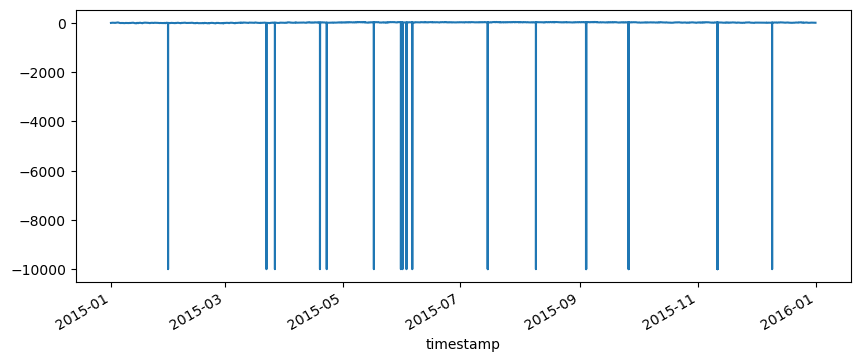

In [68]:
weather_data_ciara['TemperatureC'].plot(figsize=(10, 4))

Looks like there are outliers in the dataset where some reading are very unlikely with temperature reaching 10,000 Deg C.

In [69]:
weather_hourly = weather_data_ciara.resample('H').mean(numeric_only=True)

In [70]:
weather_hourly_nooutlier = weather_hourly[weather_hourly > -40]

In [71]:
weather_hourly['TemperatureC'].info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 8758 entries, 2015-01-01 00:00:00 to 2015-12-31 21:00:00
Freq: H
Series name: TemperatureC
Non-Null Count  Dtype  
--------------  -----  
8567 non-null   float64
dtypes: float64(1)
memory usage: 136.8 KB


In [72]:
weather_hourly_nooutlier['TemperatureC'].info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 8758 entries, 2015-01-01 00:00:00 to 2015-12-31 21:00:00
Freq: H
Series name: TemperatureC
Non-Null Count  Dtype  
--------------  -----  
8544 non-null   float64
dtypes: float64(1)
memory usage: 136.8 KB


<Axes: xlabel='timestamp'>

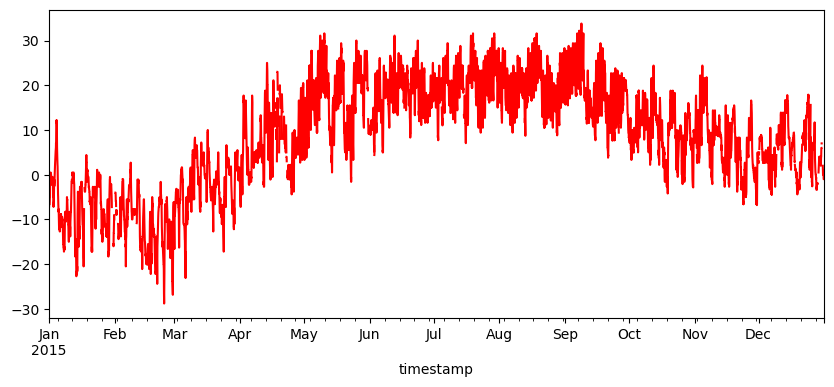

In [73]:
weather_hourly_nooutlier['TemperatureC'].plot(figsize=(10, 4), color='red')

### Filling gaps in data

We can fill the gap left by filtering the outliers by using the `.fillna()` function

In [74]:
weather_nooutlier_nogaps = weather_hourly_nooutlier.fillna(method='ffill')

<Axes: xlabel='timestamp'>

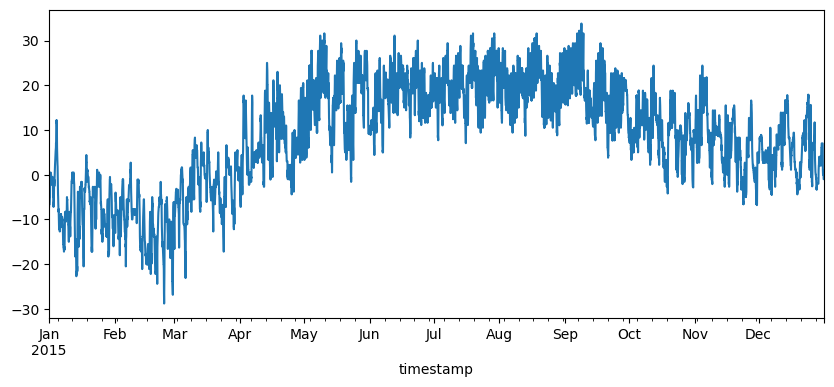

In [75]:
weather_nooutlier_nogaps["TemperatureC"].plot(figsize=(10,4))

### Combine Temperature and Electricity data

In [76]:
weather_nooutlier_nogaps['TemperatureC'].head()

timestamp
2015-01-01 00:00:00   -7.2
2015-01-01 01:00:00   -6.6
2015-01-01 02:00:00   -6.6
2015-01-01 03:00:00   -6.6
2015-01-01 04:00:00   -6.6
Freq: H, Name: TemperatureC, dtype: float64

In [77]:
rawdata = ciara_rawdata[~ciara_rawdata.index.duplicated(keep='first')]

Using `.concat()` and `.merger()` function to combine dataset

In [78]:
combined = pd.concat([weather_nooutlier_nogaps['TemperatureC'], rawdata['UnivClass_Ciara']], axis=1)

In [79]:
merged = pd.merge(weather_nooutlier_nogaps['TemperatureC'], rawdata['UnivClass_Ciara'], left_index=True, right_index=True, how='outer')

In [80]:
merged.head()

TemperatureC  UnivClass_Ciara
timestamp                                         
2015-01-01 00:00:00          -7.2       136.824997
2015-01-01 01:00:00          -6.6       144.025002
2015-01-01 02:00:00          -6.6       144.875000
2015-01-01 03:00:00          -6.6       142.375000
2015-01-01 04:00:00          -6.6       148.199997

array([<Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>],
      dtype=object)

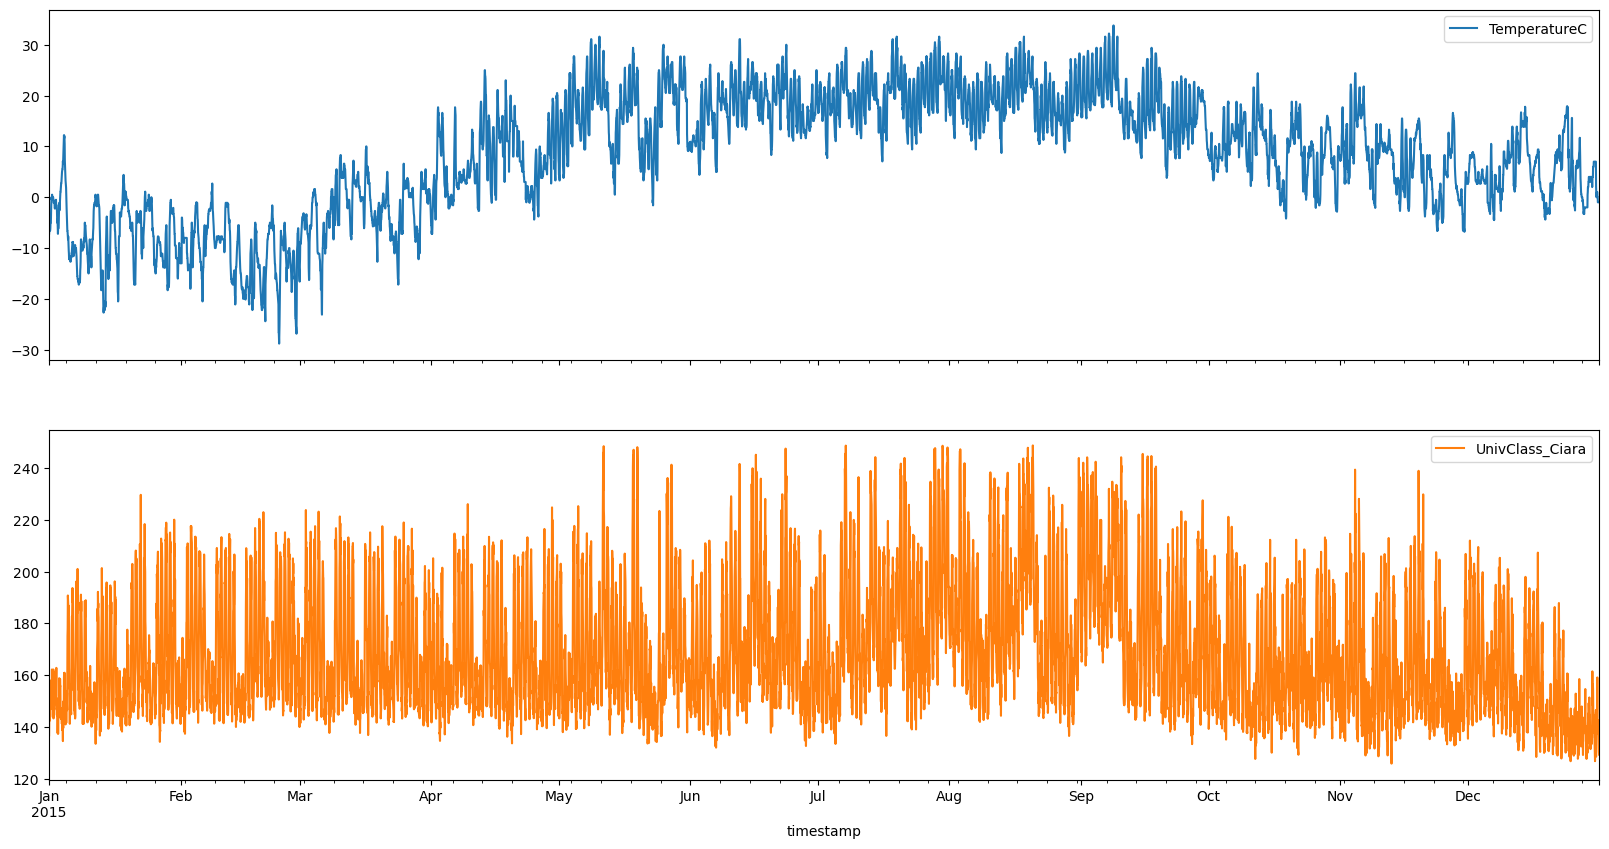

In [81]:
merged.plot(figsize=(20, 10), subplots=True)

### Analyze the weather influence on energy consumption

<Axes: xlabel='TemperatureC', ylabel='UnivClass_Ciara'>

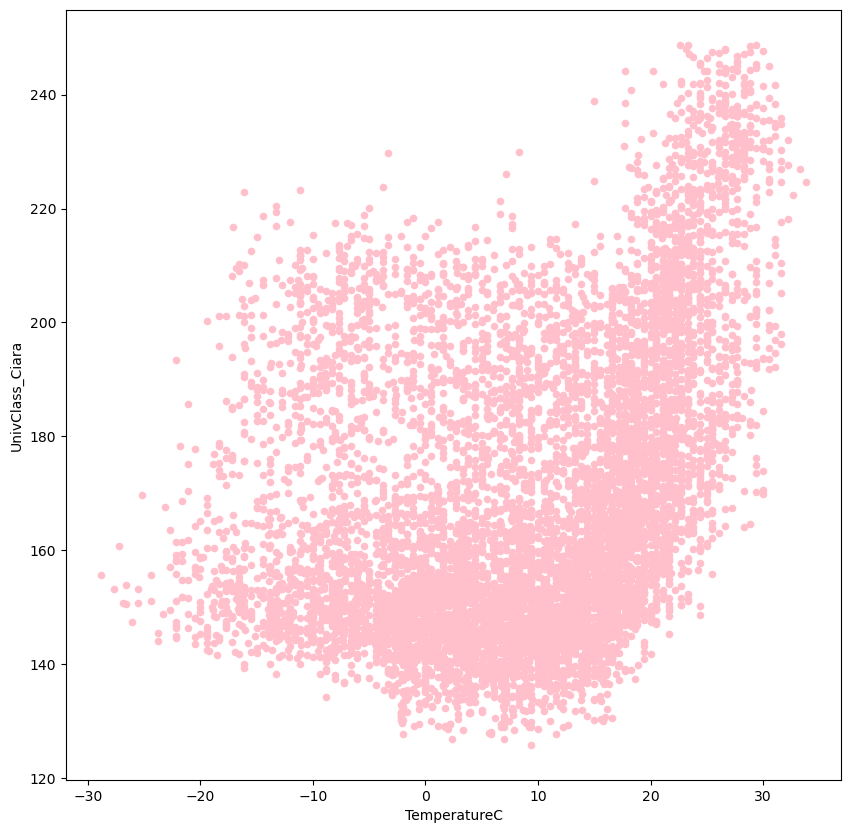

In [82]:
merged.plot(kind='scatter', x='TemperatureC', y='UnivClass_Ciara', figsize=(10,10), color='pink')

<Axes: xlabel='TemperatureC', ylabel='UnivClass_Ciara'>

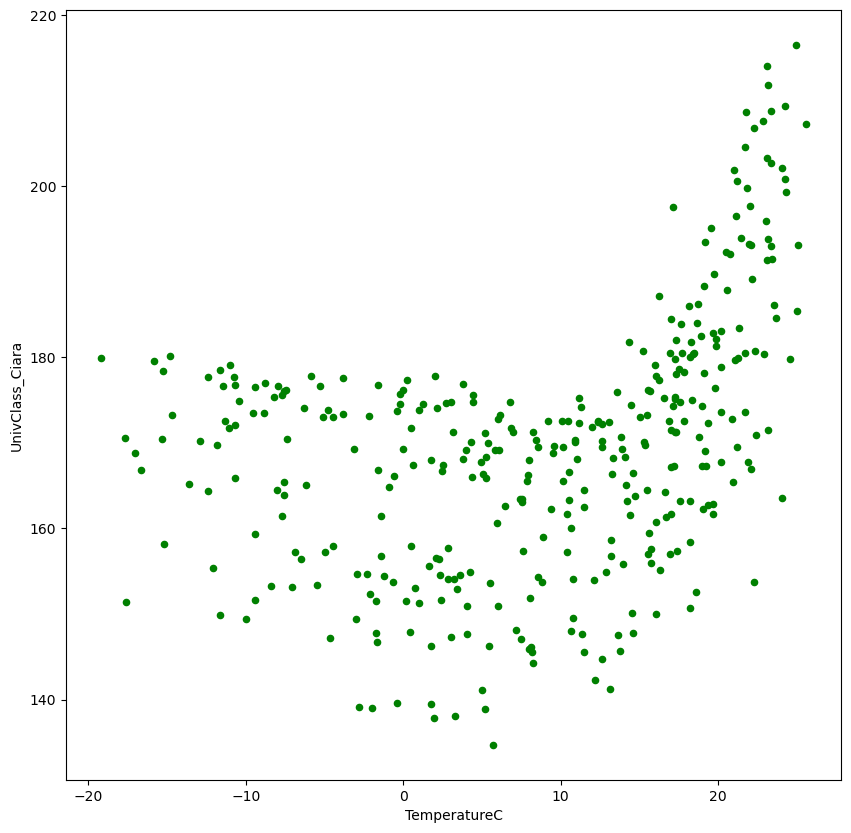

In [83]:
merged.resample("D").mean().plot(kind='scatter', x='TemperatureC', y='UnivClass_Ciara', figsize=(10,10), color='green')

### Visualizations using Seaborn

In [84]:
def make_color_division(x):
    if x < 10:
        return "Heating"
    else:
        return "Cooling"

In [85]:
combined = merged.resample("D").mean()

In [86]:
combined.head()

TemperatureC  UnivClass_Ciara
timestamp                                
2015-01-01     -3.027083       149.362500
2015-01-02     -1.704167       151.513542
2015-01-03     -1.707639       147.725000
2015-01-04      7.135417       148.089584
2015-01-05     -7.598958       163.968750

In [87]:
combined['heating_vs_cooling'] = combined.TemperatureC.apply(lambda x: make_color_division(x))

In [88]:
combined.head()

TemperatureC  UnivClass_Ciara heating_vs_cooling
timestamp                                                   
2015-01-01     -3.027083       149.362500            Heating
2015-01-02     -1.704167       151.513542            Heating
2015-01-03     -1.707639       147.725000            Heating
2015-01-04      7.135417       148.089584            Heating
2015-01-05     -7.598958       163.968750            Heating

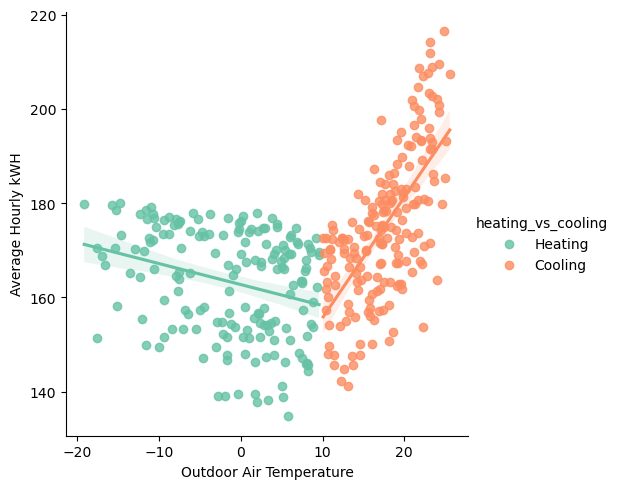

In [89]:
g = sns.lmplot(x="TemperatureC", y="UnivClass_Ciara", hue="heating_vs_cooling",
               truncate=True, data=combined, palette='Set2')

g.set_axis_labels("Outdoor Air Temperature", "Average Hourly kWH")

# Indoor Environment Quality Analysis

* For this section we will use the ASHRAE Thermal Comfort Database II.

The publication that outlines how the database was created is here: https://www.researchgate.net/publication/325848721_Development_of_the_ASHRAE_Global_Thermal_Comfort_Database_II


In [90]:
ashrae_data = pd.read_csv("./ashrae_thermal_comfort_database_2.csv", index_col='Unnamed: 0')

In [92]:
ashrae_data.head()

Publication (Citation)    Year  Season  \
2233  Indraganti, Madhavi, et al. "Adaptive model of...  2012.0  Winter   
2234  Indraganti, Madhavi, et al. "Adaptive model of...  2012.0  Winter   
2235  Indraganti, Madhavi, et al. "Adaptive model of...  2012.0  Winter   
2236  Indraganti, Madhavi, et al. "Adaptive model of...  2012.0  Winter   
2237  Indraganti, Madhavi, et al. "Adaptive model of...  2012.0  Winter   

                   Climate     City Country Building type  \
2233  Tropical wet savanna  Chennai   India        Office   
2234  Tropical wet savanna  Chennai   India        Office   
2235  Tropical wet savanna  Chennai   India        Office   
2236  Tropical wet savanna  Chennai   India        Office   
2237  Tropical wet savanna  Chennai   India        Office   

     Cooling startegy_building level     Sex  Thermal sensation   Clo  Met  \
2233                      Mixed Mode  Female               -2.0  0.75  1.0   
2234                      Mixed Mode    Male               -1.0  0.64  1.0   
2235                      Mixed Mode    Male               -2.0  0.64  1.0   
2236                      Mixed Mode  Female               -2.0  0.75  1.0   
2237                      Mixed Mode    Male                0.0  0.72  1.0   

      Air temperature (C)  Relative humidity (%)  Air velocity (m/s)  \
2233                 25.2                   64.0                 0.1   
2234                 25.2                   64.0                 0.1   
2235                 25.2                   64.0                 0.1   
2236                 25.2                   64.0                 0.1   
2237                 25.2                   64.0                 0.1   

      ThermalSensation_rounded  
2233                      -2.0  
2234                      -1.0  
2235                      -2.0  
2236                      -2.0  
2237                       0.0

### Summarizing Data

In [94]:
ashrae_data.describe()

Year  Thermal sensation           Clo           Met  \
count  43448.000000       43448.000000  43448.000000  43448.000000   
mean    2003.163621           0.127440      0.634063      1.177975   
std       10.326515           1.125046      0.255987      0.251705   
min     1982.000000          -3.000000      0.000000      0.700000   
25%     1994.000000          -0.500000      0.470000      1.000000   
50%     2010.000000           0.000000      0.620000      1.100000   
75%     2012.000000           1.000000      0.720000      1.200000   
max     2016.000000           3.000000      2.870000      6.830000   

       Air temperature (C)  Relative humidity (%)  Air velocity (m/s)  \
count         43448.000000           43448.000000        43448.000000   
mean             25.215932              51.553517            0.202853   
std               3.426420              14.709984            0.317471   
min              13.100000               0.500000            0.000000   
25%              22.900000              41.400000            0.060000   
50%              24.700000              51.600000            0.100000   
75%              27.200000              62.400000            0.210000   
max              48.800000              97.800000            6.540000   

       ThermalSensation_rounded  
count              43448.000000  
mean                   0.128222  
std                    1.127096  
min                   -3.000000  
25%                    0.000000  
50%                    0.000000  
75%                    1.000000  
max                    3.000000

In [96]:
ashrae_data['Clo'].sum()

51180.659999999996

In [98]:
ashrae_data['Clo'].mean()

0.6340632480206223

In [99]:
ashrae_data['Clo'].std()

0.25598709252418184

### Understanding the diversity of data
This data contains lot of categories in column

In [100]:
ashrae_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43448 entries, 2233 to 104033
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Publication (Citation)           43448 non-null  object 
 1   Year                             43448 non-null  float64
 2   Season                           43448 non-null  object 
 3   Climate                          43448 non-null  object 
 4   City                             43448 non-null  object 
 5   Country                          43448 non-null  object 
 6   Building type                    43448 non-null  object 
 7   Cooling startegy_building level  43448 non-null  object 
 8   Sex                              43448 non-null  object 
 9   Thermal sensation                43448 non-null  float64
 10  Clo                              43448 non-null  float64
 11  Met                              43448 non-null  float64
 12  Air temperatur

In [103]:
ashrae_data['Country'].nunique()

17

In [104]:
ashrae_data['Country'].value_counts()

India          15191
Brazil          7074
Australia       6940
USA             2950
UK              2056
Portugal        1558
Greece          1283
Thailand        1146
Sweden           940
Malaysia         869
Canada           867
Singapore        812
France           465
Germany          414
Iran             377
Philippines      277
Italy            229
Name: Country, dtype: int64

In [105]:
ashrae_data['Building type'].value_counts()

Office                 29913
Classroom               6042
Others                  4615
Multifamily housing     2369
Senior center            509
Name: Building type, dtype: int64

In [106]:
ashrae_data['Cooling startegy_building level'].value_counts()

Mixed Mode                 16280
Air Conditioned            14051
Naturally Ventilated       12952
Mechanically Ventilated      165
Name: Cooling startegy_building level, dtype: int64

### Grouping data

In [107]:
ashrae_data.groupby("Country").mean(numeric_only=True)

Year  Thermal sensation       Clo       Met  \
Country                                                           
Australia    1993.472190           0.133530  0.580548  1.218186   
Brazil       2010.000000           0.141787  0.527037  1.088762   
Canada       1994.491349          -0.280277  0.721569  1.211073   
France       1998.554839           0.436559  0.749505  1.375484   
Germany      2005.000000           0.483092  0.560676  1.449034   
Greece       1994.552611           0.524552  0.470966  1.243024   
India        2011.875518           0.058930  0.704502  1.122783   
Iran         1999.000000          -0.188329  1.484987  1.517507   
Italy        2008.000000           0.314410  0.624061  1.290830   
Malaysia     2007.000000           0.249712  0.266329  1.033257   
Philippines  2003.000000          -1.036101  0.648664  1.282671   
Portugal     1998.607189           0.146341  0.808472  1.474390   
Singapore    1986.717980           0.376478  0.288805  1.178017   
Sweden       1998.535106           0.017021  0.782606  1.377021   
Thailand     1988.000000           0.372600  0.548857  1.100000   
UK           1998.376946           0.223249  0.661785  1.385846   
USA          1988.147119           0.173695  0.659556  1.120407   

             Air temperature (C)  Relative humidity (%)  Air velocity (m/s)  \
Country                                                                       
Australia              23.747651              50.347320            0.140030   
Brazil                 25.369211              64.132627            0.299327   
Canada                 23.475663              33.447174            0.086367   
France                 24.155484              38.222151            0.234301   
Germany                24.757729              48.612560            1.113116   
Greece                 29.038270              35.262120            0.336633   
India                  26.440109              49.166757            0.210093   
Iran                   20.019363              61.959947            0.031353   
Italy                  25.455022              34.427948            0.589651   
Malaysia               30.737745              70.929919            0.262025   
Philippines            23.755596              47.368592            0.144874   
Portugal               22.851540              51.055135            0.075597   
Singapore              27.559606              68.439039            0.187525   
Sweden                 22.904255              36.141064            0.027415   
Thailand               26.065707              63.890314            0.191902   
UK                     22.894407              45.579523            0.135934   
USA                    22.863356              46.020542            0.083495   

             ThermalSensation_rounded  
Country                                
Australia                    0.133141  
Brazil                       0.141787  
Canada                      -0.280277  
France                       0.436559  
Germany                      0.483092  
Greece                       0.524552  
India                        0.060891  
Iran                        -0.188329  
Italy                        0.314410  
Malaysia                     0.249712  
Philippines                 -1.036101  
Portugal                     0.146341  
Singapore                    0.381773  
Sweden                       0.017021  
Thailand                     0.370855  
UK                           0.223249  
USA                          0.175254

In [108]:
ashrae_data.groupby("Country").median(numeric_only=True)

Year  Thermal sensation    Clo   Met  Air temperature (C)  \
Country                                                                    
Australia    1992.0                0.0  0.540  1.17                 23.5   
Brazil       2010.0                0.0  0.500  1.00                 25.3   
Canada       1994.0                0.0  0.700  1.20                 23.3   
France       1999.0                0.0  0.730  1.30                 24.1   
Germany      2005.0                0.0  0.560  1.30                 24.4   
Greece       1993.0                1.0  0.390  1.20                 29.5   
India        2012.0                0.0  0.680  1.10                 26.2   
Iran         1999.0                0.0  1.500  1.60                 20.3   
Italy        2008.0                0.0  0.620  1.20                 25.7   
Malaysia     2007.0                0.0  0.270  1.00                 30.6   
Philippines  2003.0               -1.0  0.650  1.30                 23.7   
Portugal     1999.0                0.0  0.750  1.30                 23.0   
Singapore    1987.0                0.0  0.315  1.13                 28.9   
Sweden       1999.0                0.0  0.750  1.20                 22.9   
Thailand     1988.0                0.0  0.560  1.10                 24.6   
UK           1998.0                0.0  0.650  1.20                 22.8   
USA          1987.0                0.0  0.620  1.00                 22.8   

             Relative humidity (%)  Air velocity (m/s)  \
Country                                                  
Australia                    50.80                0.11   
Brazil                       64.00                0.20   
Canada                       34.10                0.08   
France                       38.10                0.05   
Germany                      48.20                0.53   
Greece                       34.90                0.20   
India                        48.00                0.10   
Iran                         63.00                0.03   
Italy                        30.40                0.09   
Malaysia                     71.30                0.20   
Philippines                  46.20                0.13   
Portugal                     51.10                0.06   
Singapore                    69.70                0.15   
Sweden                       33.95                0.03   
Thailand                     63.20                0.13   
UK                           45.50                0.07   
USA                          45.70                0.07   

             ThermalSensation_rounded  
Country                                
Australia                         0.0  
Brazil                            0.0  
Canada                            0.0  
France                            0.0  
Germany                           0.0  
Greece                            1.0  
India                             0.0  
Iran                              0.0  
Italy                             0.0  
Malaysia                          0.0  
Philippines                      -1.0  
Portugal                          0.0  
Singapore                         0.0  
Sweden                            0.0  
Thailand                          0.0  
UK                                0.0  
USA                               0.0

In [113]:
# total number of counts for each group
ashrae_data.groupby("Country").size()

Country
Australia       6940
Brazil          7074
Canada           867
France           465
Germany          414
Greece          1283
India          15191
Iran             377
Italy            229
Malaysia         869
Philippines      277
Portugal        1558
Singapore        812
Sweden           940
Thailand        1146
UK              2056
USA             2950
dtype: int64

### Plotting data

<Axes: >

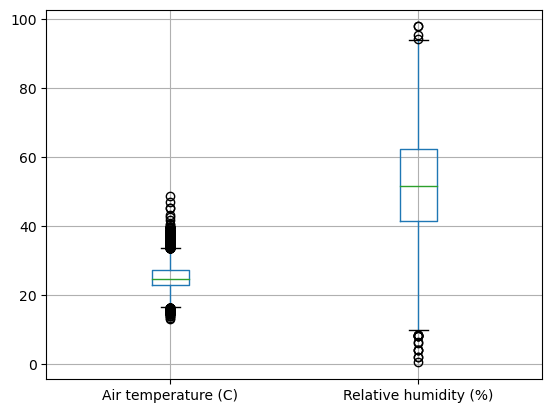

In [114]:
ashrae_data[['Air temperature (C)', 'Relative humidity (%)']].boxplot()

<Axes: >

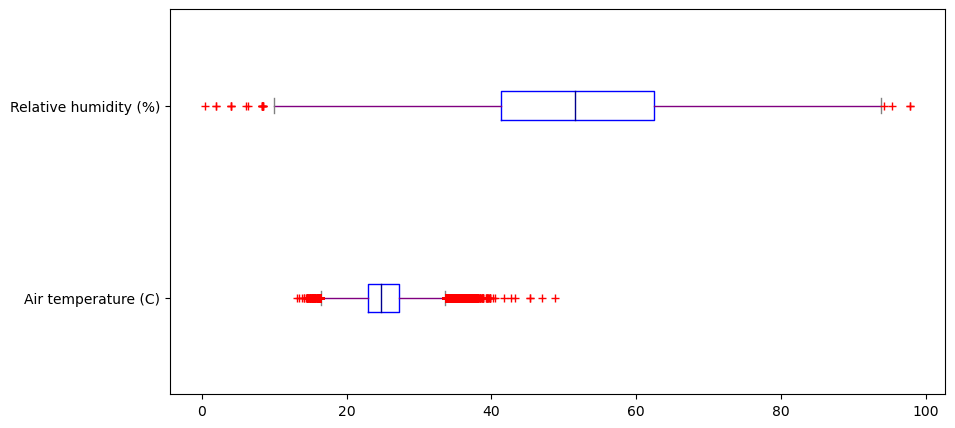

In [121]:
color = {'boxes': 'Blue', 'whiskers': 'purple',  'medians': 'DarkBlue', 'caps': 'Gray'}
ashrae_data[['Air temperature (C)','Relative humidity (%)']].plot.box(color=color, sym='r+', figsize=(10,5), vert=False)

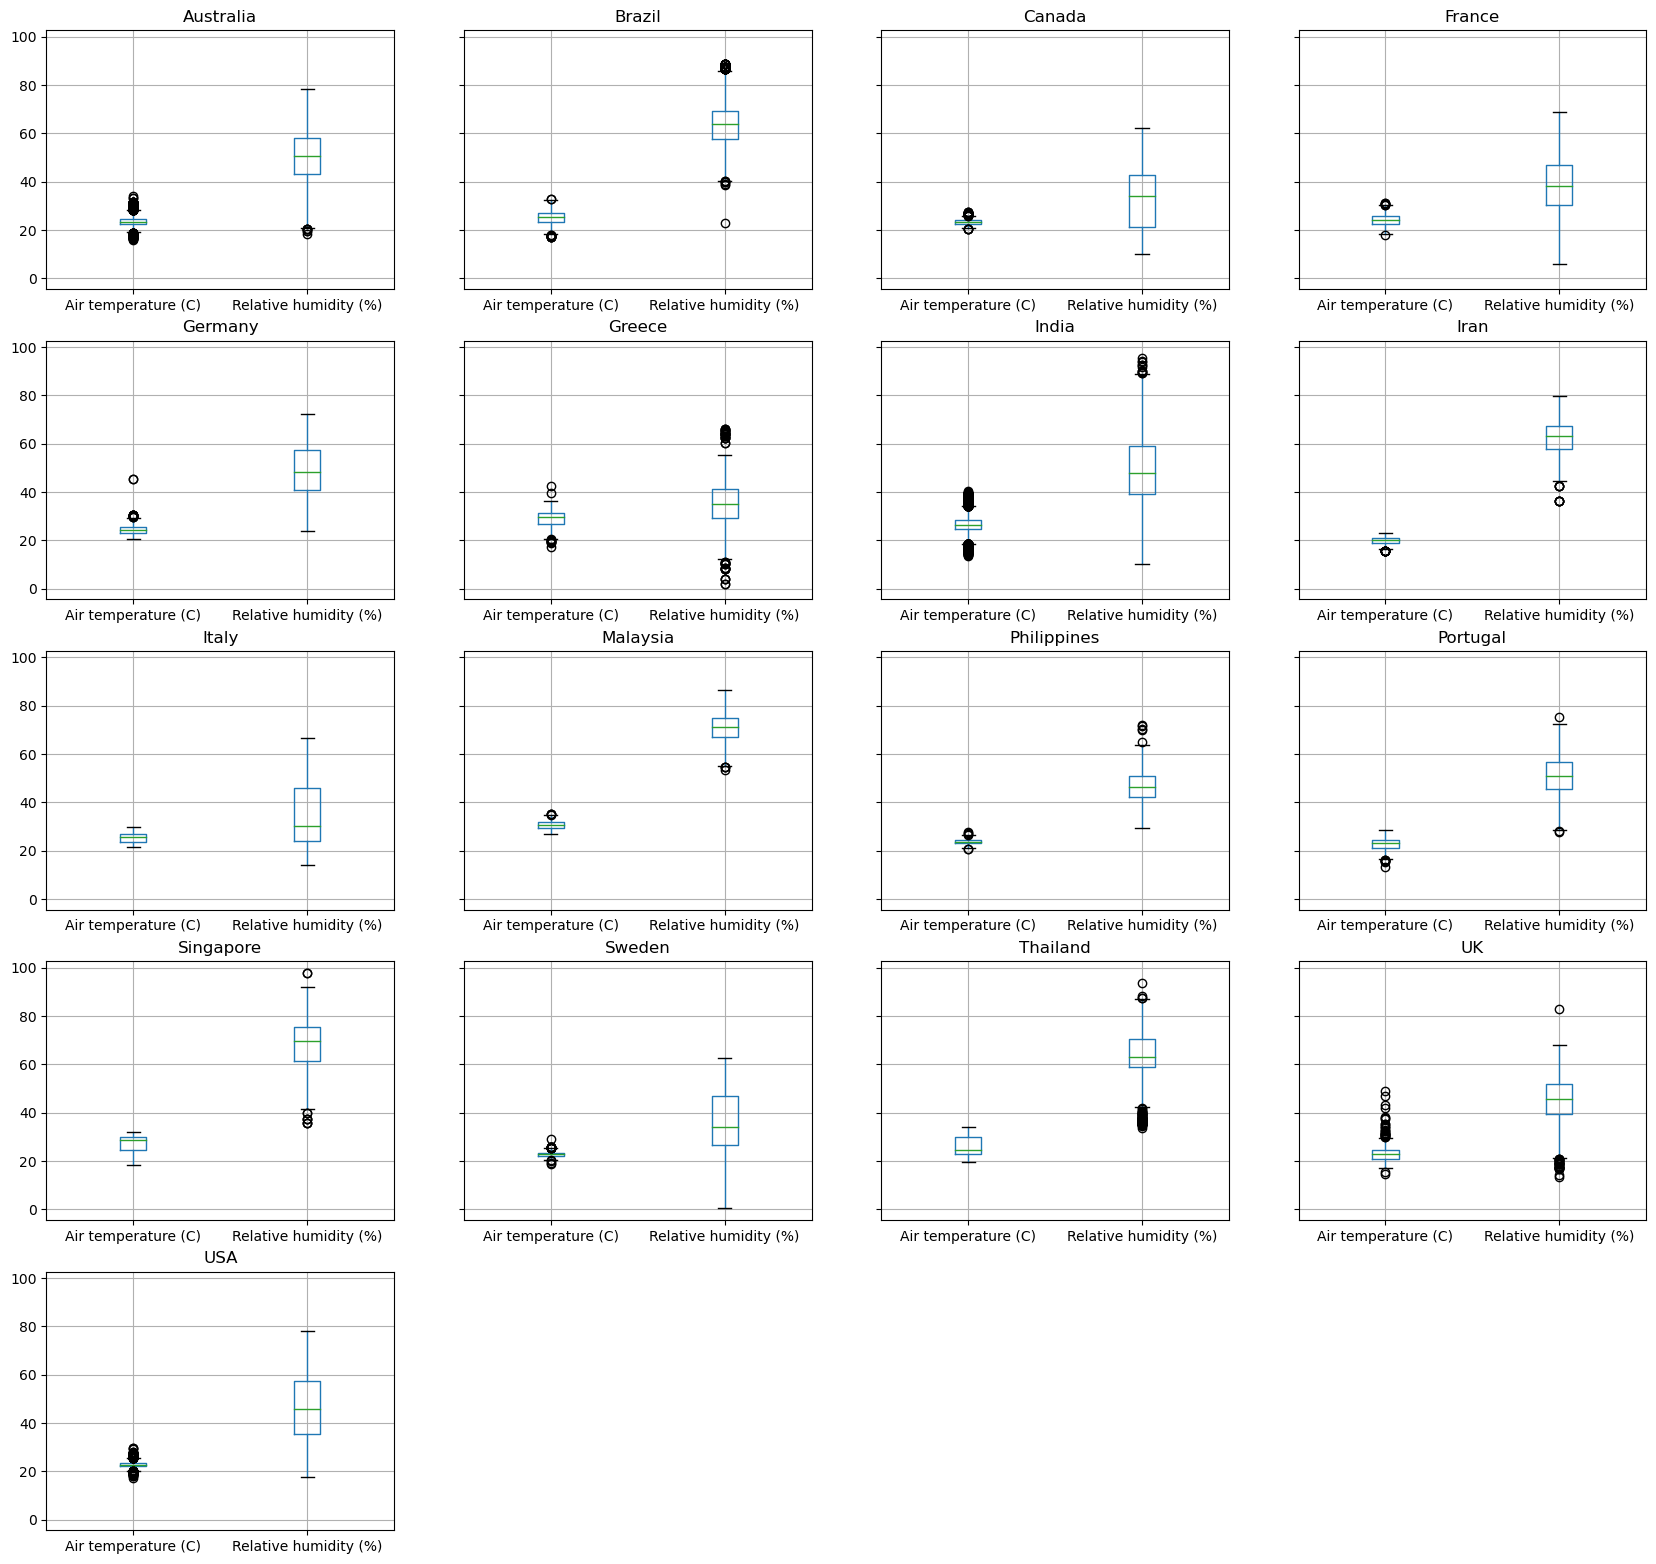

In [123]:
ashrae_data[['Air temperature (C)','Relative humidity (%)','Country']].groupby('Country').boxplot(figsize=(20,20));

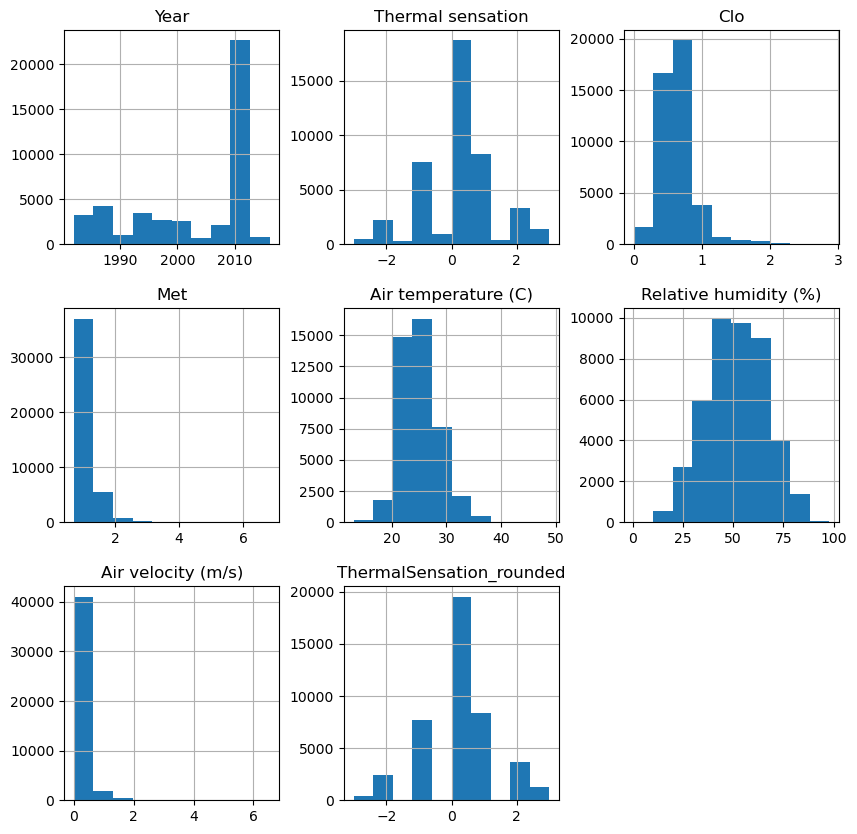

In [125]:
ashrae_data.hist(figsize=(10, 10));

<Axes: ylabel='Density'>

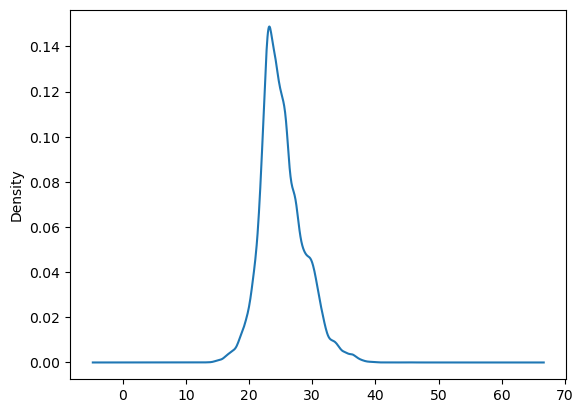

In [126]:
# Density plots
ashrae_data['Air temperature (C)'].plot.kde()

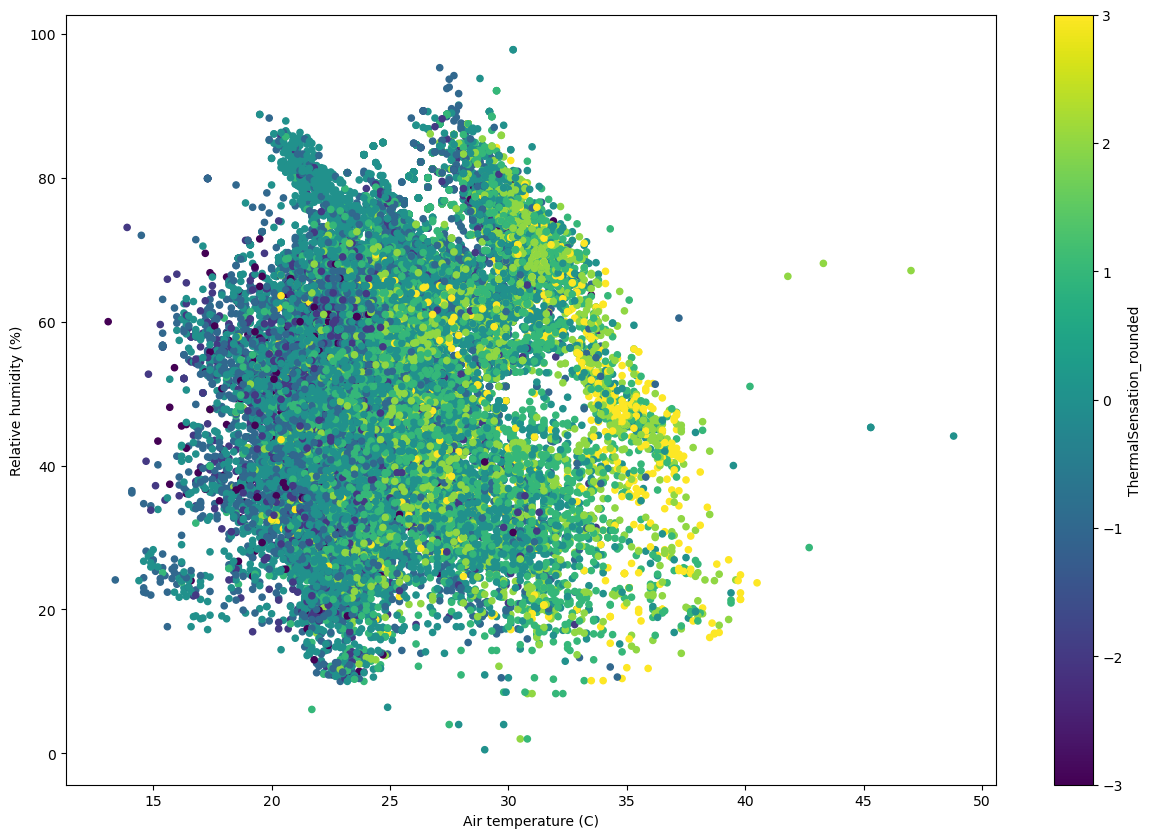

In [133]:
ashrae_data.plot.scatter(x='Air temperature (C)', y='Relative humidity (%)', c='ThermalSensation_rounded', figsize=(15,10));

### Parallel Coordinate Plots
Parallel coordinate plots are a multi-variate visualation method to compare several quantitative columns at the same time.


In [150]:
from pandas.plotting import parallel_coordinates
ashrae_data[['Air temperature (C)','Relative humidity (%)','ThermalSensation_rounded','Air velocity (m/s)']].iloc[:500].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 2233 to 2732
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Air temperature (C)       500 non-null    float64
 1   Relative humidity (%)     500 non-null    float64
 2   ThermalSensation_rounded  500 non-null    float64
 3   Air velocity (m/s)        500 non-null    float64
dtypes: float64(4)
memory usage: 19.5 KB


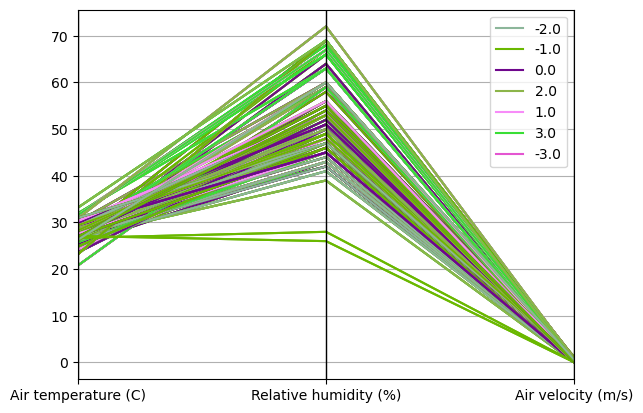

In [149]:
parallel_coordinates(ashrae_data[['Air temperature (C)','Relative humidity (%)','ThermalSensation_rounded','Air velocity (m/s)']].iloc[:500], 'ThermalSensation_rounded', color="");

# Conditions comfortable for people ?

practical investigation of the what conditions influence the comfort of occupants in the various contexts that were tested in the ASHRAE Thermal Comfort Database II studies.

We will go through and investigate how temperature, humidity, air movement, and other factors influence comfort.

In [151]:
ashrae_data = pd.read_csv("ashrae_thermal_comfort_database_2.csv", index_col='Unnamed: 0')

In [152]:
ashrae_data.head()

Publication (Citation)    Year  Season  \
2233  Indraganti, Madhavi, et al. "Adaptive model of...  2012.0  Winter   
2234  Indraganti, Madhavi, et al. "Adaptive model of...  2012.0  Winter   
2235  Indraganti, Madhavi, et al. "Adaptive model of...  2012.0  Winter   
2236  Indraganti, Madhavi, et al. "Adaptive model of...  2012.0  Winter   
2237  Indraganti, Madhavi, et al. "Adaptive model of...  2012.0  Winter   

                   Climate     City Country Building type  \
2233  Tropical wet savanna  Chennai   India        Office   
2234  Tropical wet savanna  Chennai   India        Office   
2235  Tropical wet savanna  Chennai   India        Office   
2236  Tropical wet savanna  Chennai   India        Office   
2237  Tropical wet savanna  Chennai   India        Office   

     Cooling startegy_building level     Sex  Thermal sensation   Clo  Met  \
2233                      Mixed Mode  Female               -2.0  0.75  1.0   
2234                      Mixed Mode    Male               -1.0  0.64  1.0   
2235                      Mixed Mode    Male               -2.0  0.64  1.0   
2236                      Mixed Mode  Female               -2.0  0.75  1.0   
2237                      Mixed Mode    Male                0.0  0.72  1.0   

      Air temperature (C)  Relative humidity (%)  Air velocity (m/s)  \
2233                 25.2                   64.0                 0.1   
2234                 25.2                   64.0                 0.1   
2235                 25.2                   64.0                 0.1   
2236                 25.2                   64.0                 0.1   
2237                 25.2                   64.0                 0.1   

      ThermalSensation_rounded  
2233                      -2.0  
2234                      -1.0  
2235                      -2.0  
2236                      -2.0  
2237                       0.0

###  Is it air temperature, humidity, air movement? Other stuff?

Let's use box plots to investigate!

<Axes: xlabel='ThermalSensation_rounded', ylabel='Air temperature (C)'>

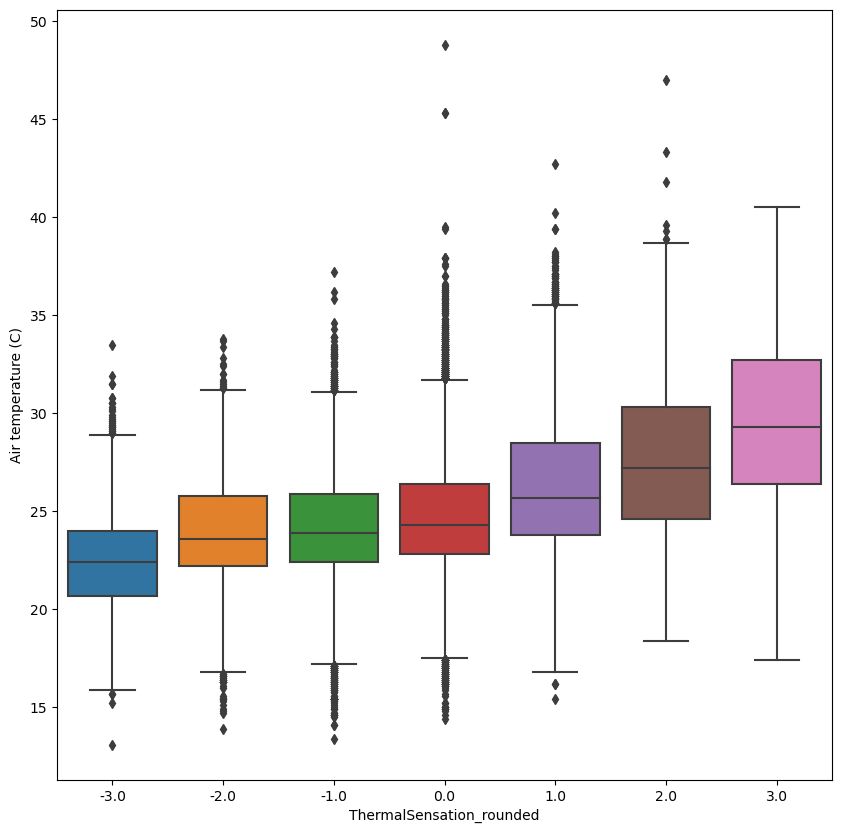

In [154]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10,10)
sns.boxplot(x="ThermalSensation_rounded", y="Air temperature (C)", data=ashrae_data)

<Axes: xlabel='ThermalSensation_rounded', ylabel='Relative humidity (%)'>

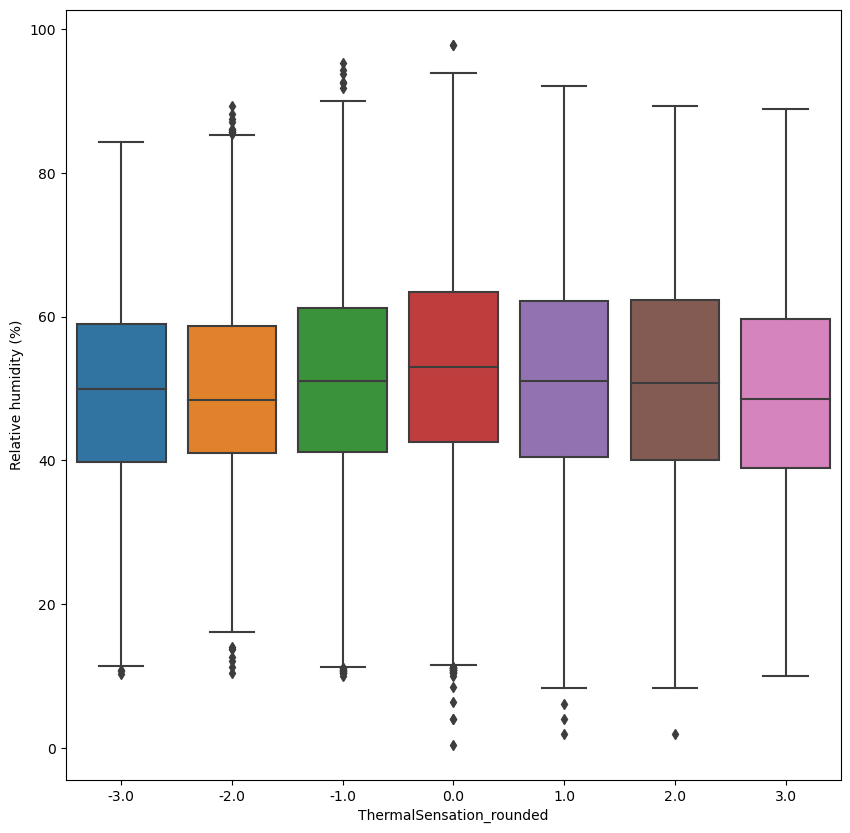

In [155]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10,10)
sns.boxplot(data=ashrae_data, x="ThermalSensation_rounded", y="Relative humidity (%)")

<Axes: xlabel='ThermalSensation_rounded', ylabel='Air velocity (m/s)'>

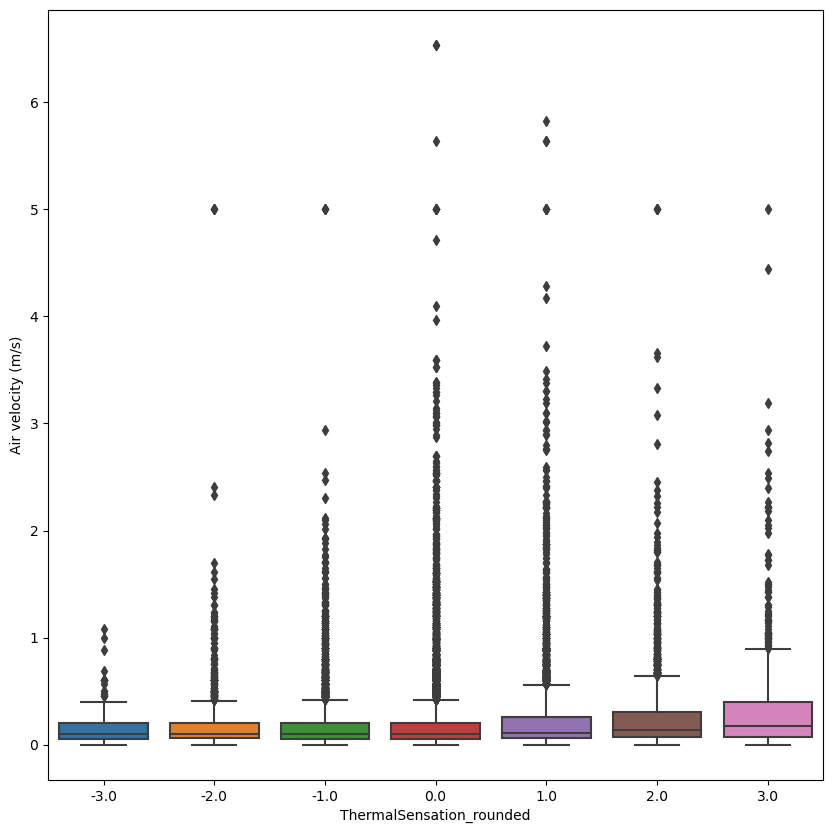

In [156]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10,10)
sns.boxplot(data=ashrae_data, x="ThermalSensation_rounded", y="Air velocity (m/s)")

### Does personal attributes have an impact?

<Axes: xlabel='ThermalSensation_rounded', ylabel='Air temperature (C)'>

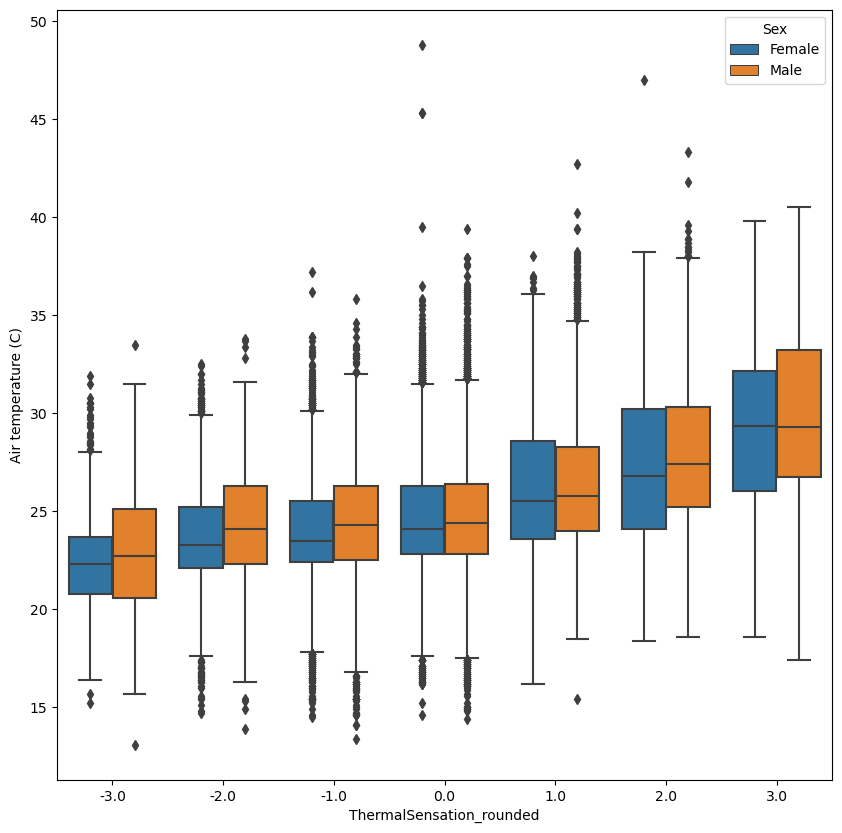

In [157]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10,10)
sns.boxplot( data=ashrae_data, x="ThermalSensation_rounded", y="Air temperature (C)", hue="Sex")

In [159]:
ashrae_data["Met_rounded"]= ashrae_data["Met"].round(0)
ashrae_data["Clo_rounded"]= ashrae_data["Clo"].round(0)

<Axes: xlabel='ThermalSensation_rounded', ylabel='Air temperature (C)'>

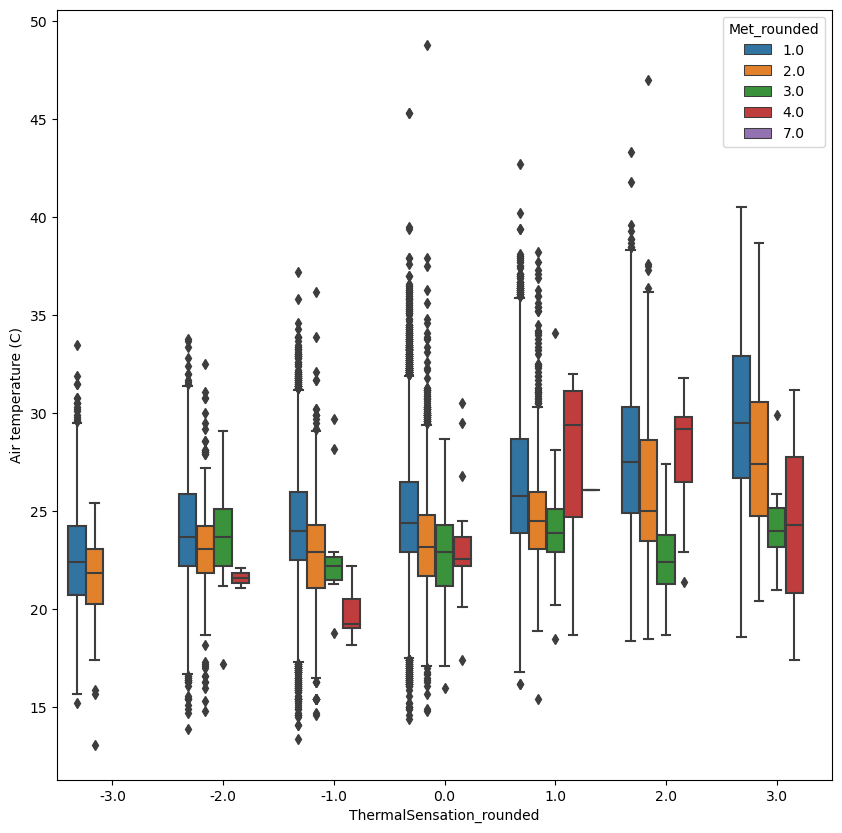

In [160]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10,10)
sns.boxplot(data=ashrae_data, x="ThermalSensation_rounded", y="Air temperature (C)", hue="Met_rounded")

### How does building type or its systems influence people's comfort?

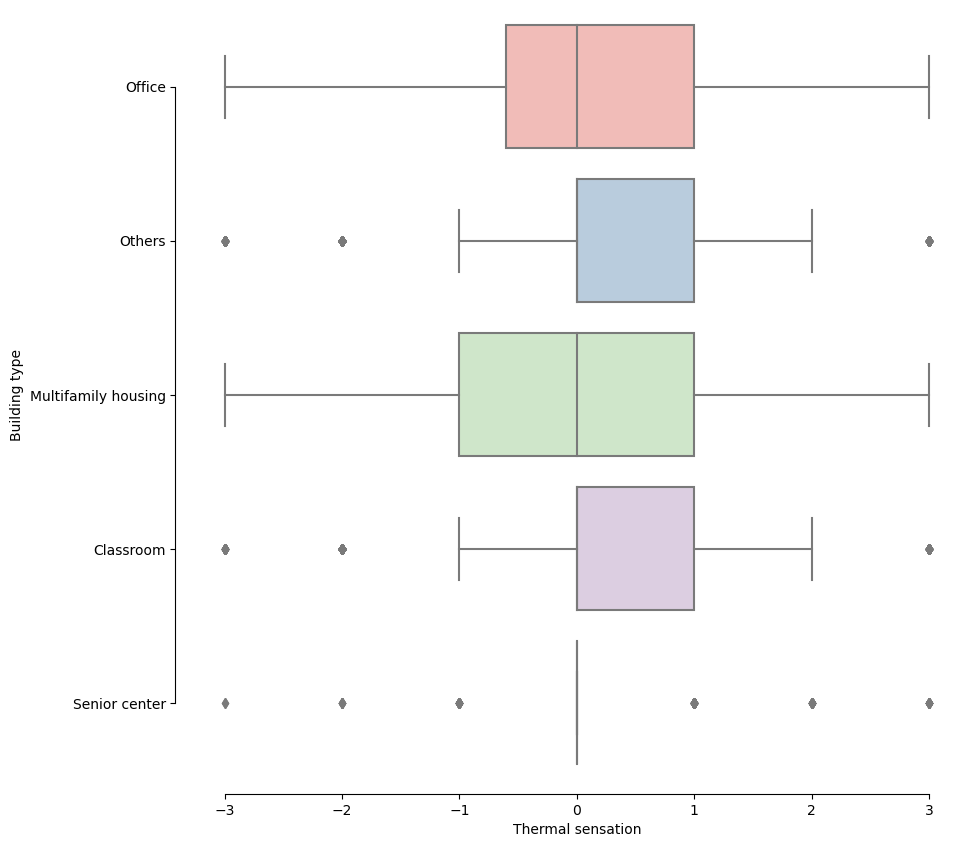

In [165]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10,10)
sns.boxplot(y="Building type", x="Thermal sensation",
             palette="Pastel1",
            data=ashrae_data[["Building type","Thermal sensation","Sex"]].dropna())

sns.despine(offset=10, trim=True)

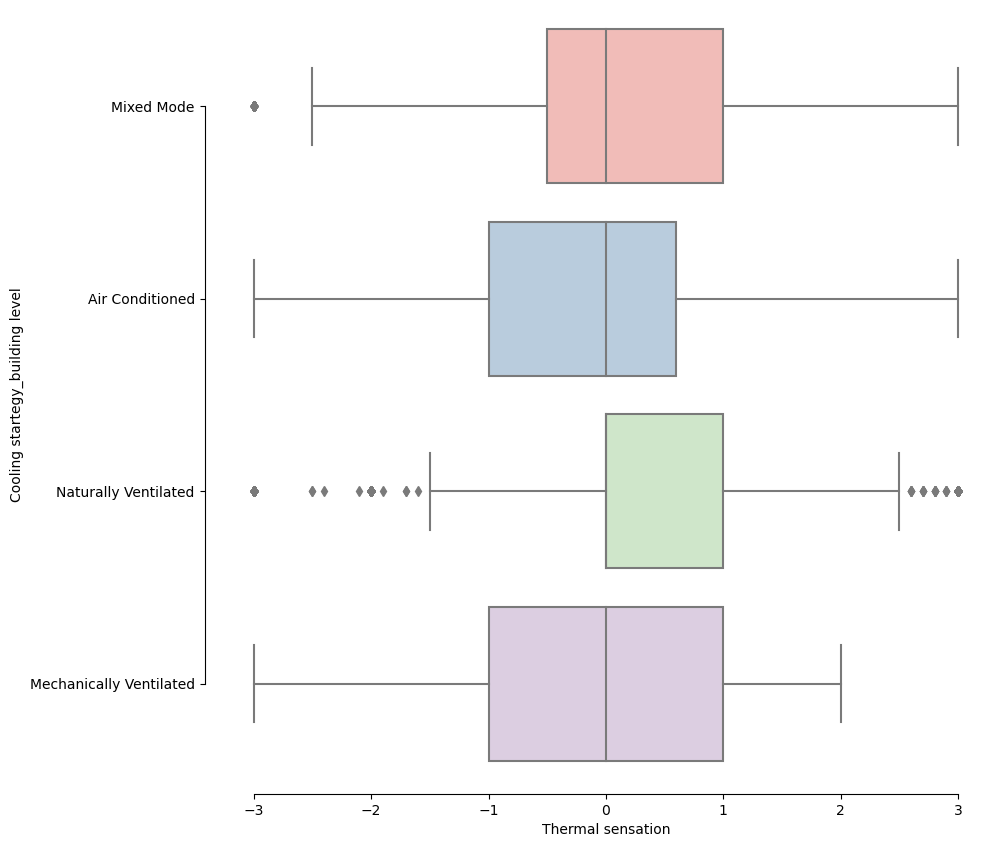

In [166]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10,10)
sns.boxplot(y="Cooling startegy_building level", x="Thermal sensation",
             palette="Pastel1",
            data=ashrae_data[["Cooling startegy_building level","Thermal sensation"]].dropna())

sns.despine(offset=10, trim=True)

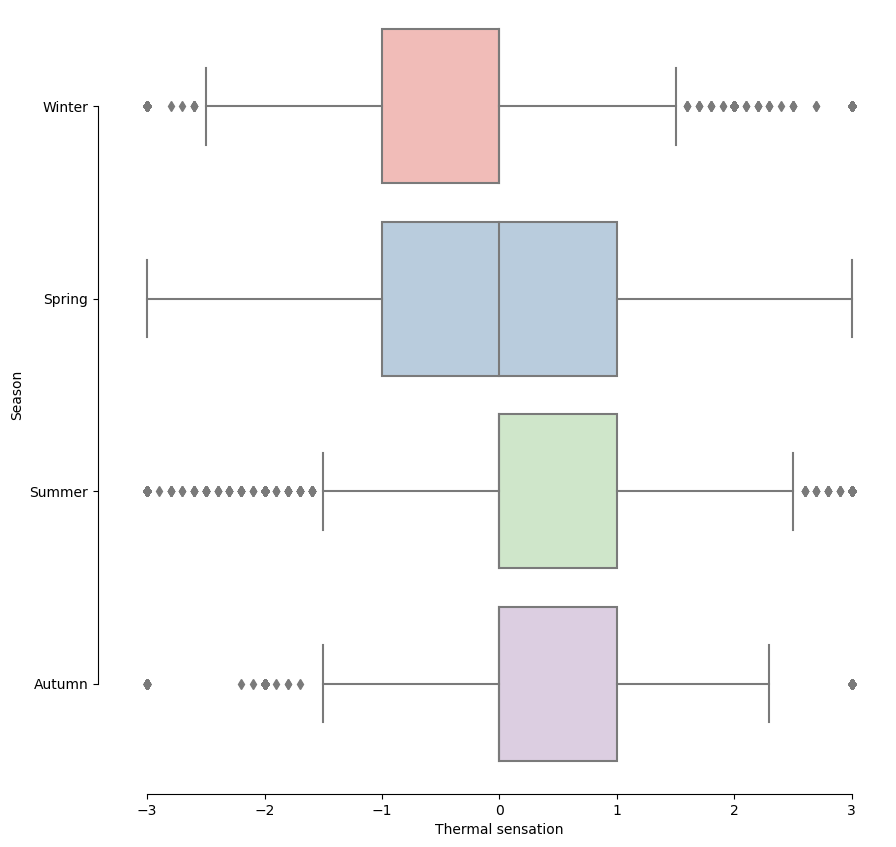

In [167]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10,10)
sns.boxplot(y="Season", x="Thermal sensation",
             palette="Pastel1",
            data=ashrae_data[["Season","Thermal sensation"]].dropna())

sns.despine(offset=10, trim=True)

### How does people from different country perceive comfort?

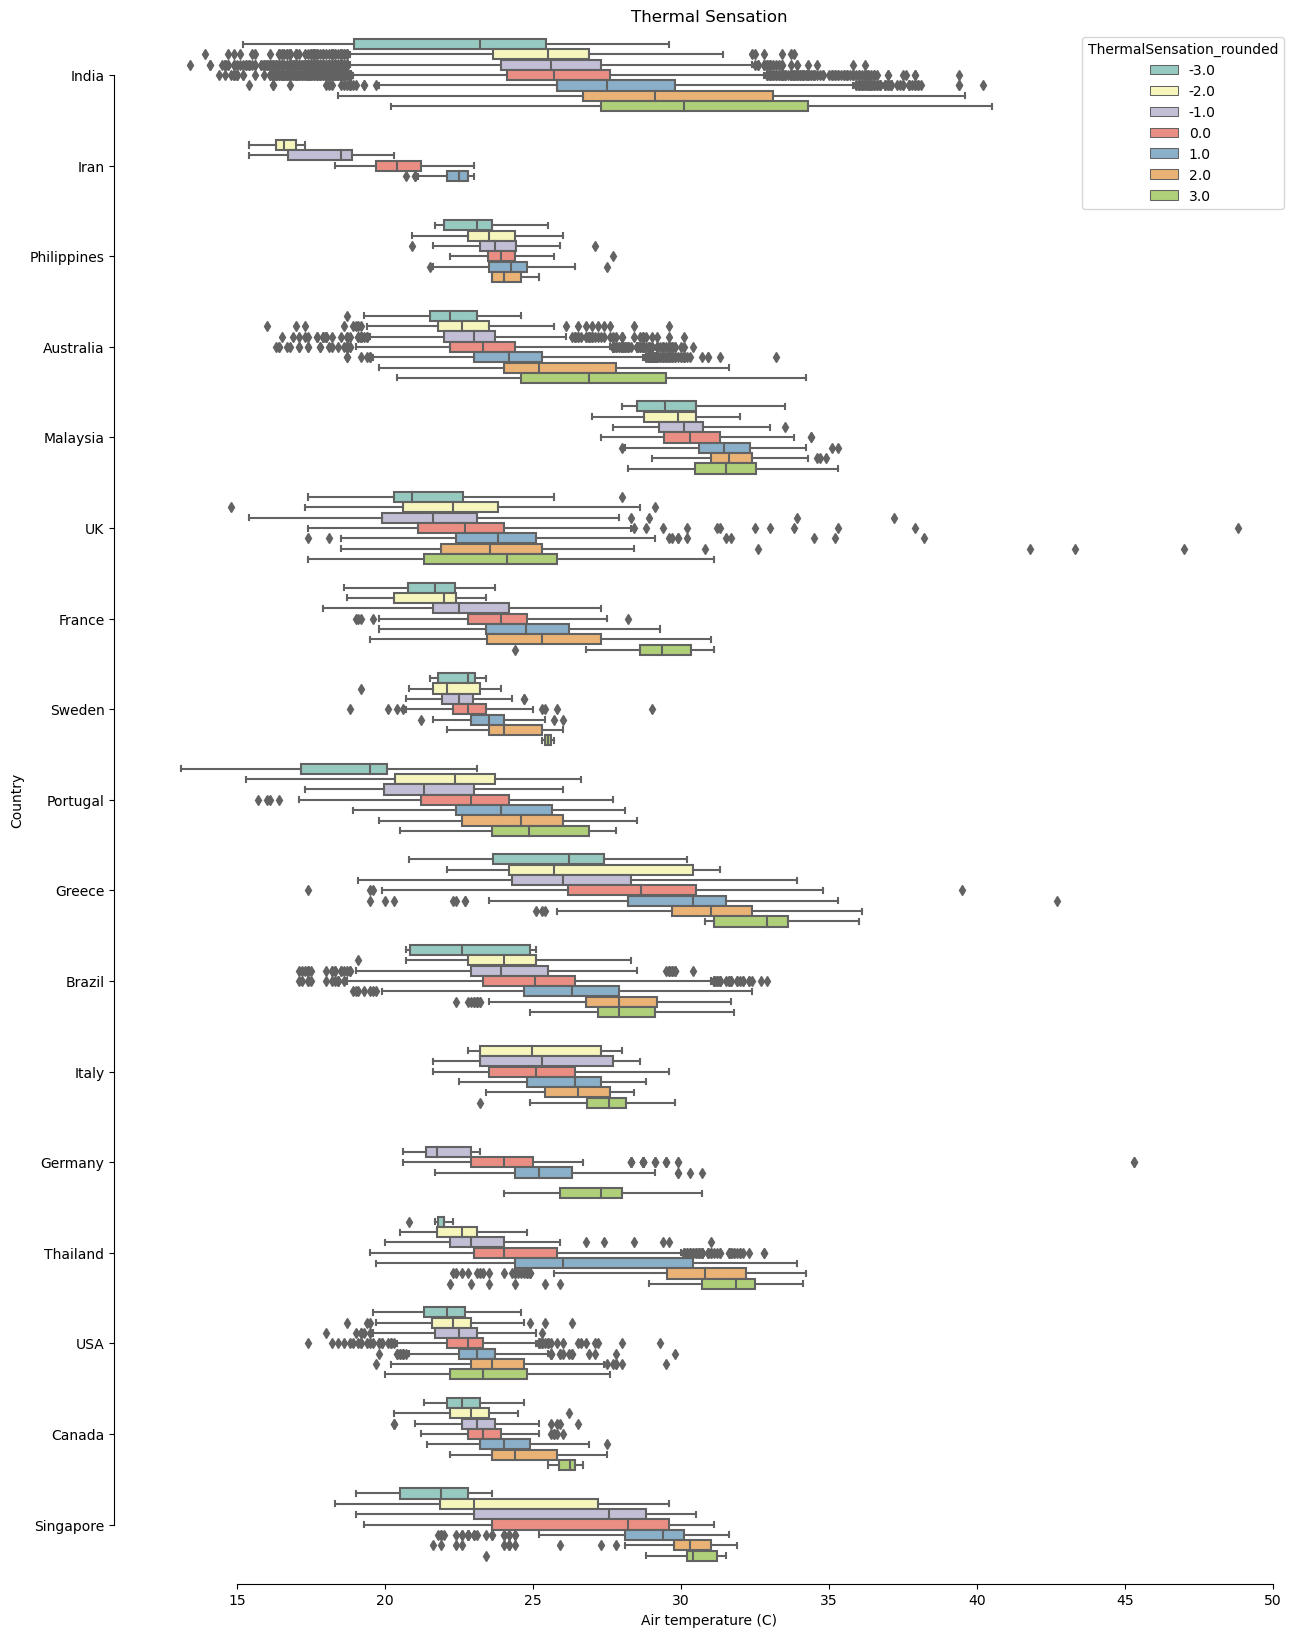

In [171]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(15,20)
sns.boxplot(y="Country", x="Air temperature (C)",
            hue="ThermalSensation_rounded", palette="Set3",
            data=ashrae_data[["Country","Air temperature (C)","ThermalSensation_rounded"]].dropna())
plt.title("Thermal Sensation")
sns.despine(offset=10, trim=True)

# Machine Learning Model
Unsupervised Learning using Clustering and Supervised Prediction using Regression

### Building Data Genome Project Data Set for Clustering and Regression Prediction

In [215]:
import numpy as np
import sklearn
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
from scipy.cluster.vq import kmeans, vq, whiten
from scipy.spatial.distance import cdist
from datetime import datetime

In [216]:
df = pd.read_csv('./meter_data/Office_Amelia.csv', index_col = "timestamp", parse_dates=True) 

In [217]:
df.head()

Office_Amelia
timestamp                         
2015-01-01 00:00:00           3.96
2015-01-01 01:00:00           4.44
2015-01-01 02:00:00           4.82
2015-01-01 03:00:00           4.28
2015-01-01 04:00:00          18.79

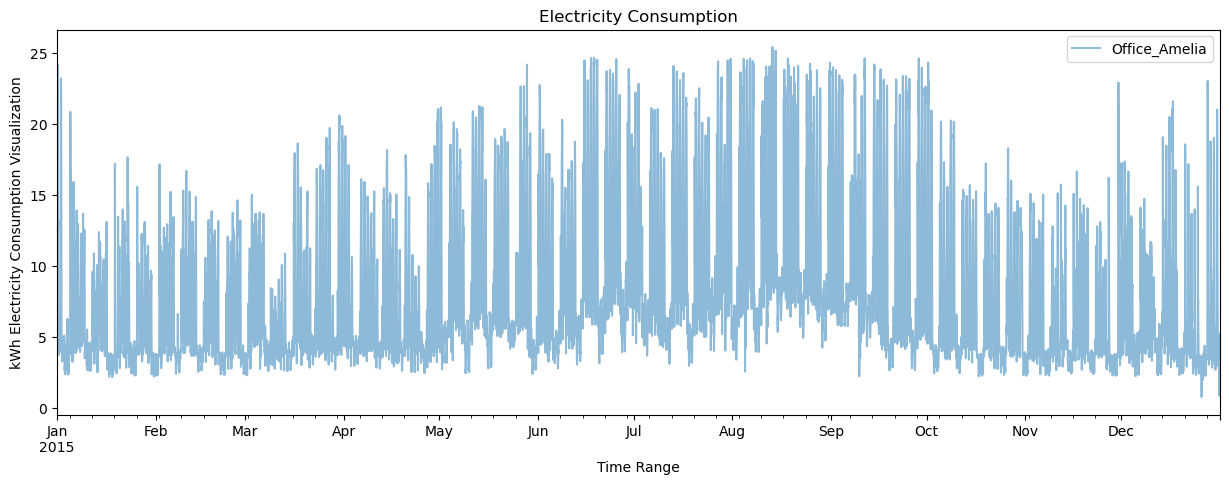

In [218]:
df.plot(alpha=0.5, figsize=(15, 5))
plt.title("Electricity Consumption")
plt.xlabel("Time Range")
plt.ylabel("kWh Electricity Consumption Visualization");

In [219]:
df.index[0]

Timestamp('2015-01-01 00:00:00')

In [ ]:
df.truncate(before='01-02-2015', after='14-02-2015').plot(figsize=(15,5))
plt.title("Electricity Consumption")
plt.xlabel("Time Range")
plt.ylabel("kWh Electricity Consumption Visualization");

C:\Users\kamal\AppData\Local\Temp\ipykernel_22356\336101817.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df.truncate(before='01-02-2015', after='14-02-2015').plot(figsize=(15,5))


### Daily Profile Analysis - Weekday vs. Weekend¶

In [221]:
df['Date'] = df.index.map(lambda t: t.date())
df['Time'] = df.index.map(lambda t: t.time())

In [222]:
df.head()

Office_Amelia        Date      Time
timestamp                                               
2015-01-01 00:00:00           3.96  2015-01-01  00:00:00
2015-01-01 01:00:00           4.44  2015-01-01  01:00:00
2015-01-01 02:00:00           4.82  2015-01-01  02:00:00
2015-01-01 03:00:00           4.28  2015-01-01  03:00:00
2015-01-01 04:00:00          18.79  2015-01-01  04:00:00

In [223]:
df_pivot = pd.pivot_table(df, values='Office_Amelia', index='Date', columns='Time')
df_pivot.head()

Time        00:00:00  01:00:00  02:00:00  03:00:00  04:00:00  05:00:00  \
Date                                                                     
2015-01-01      3.96      4.44      4.82      4.28     18.79     24.16   
2015-01-02      4.55      4.79      4.03      4.71     19.15     23.07   
2015-01-03      4.46      4.20      4.14      4.70      4.49      4.20   
2015-01-04      4.50      4.47      3.95      4.61      4.48      4.34   
2015-01-05      4.06      3.93      4.08      4.66     20.83     20.00   

Time        06:00:00  07:00:00  08:00:00  09:00:00  ...  14:00:00  15:00:00  \
Date                                                ...                       
2015-01-01     22.65     17.08     12.46     13.24  ...      3.72      4.82   
2015-01-02     23.19     21.89     16.67      9.60  ...      3.76      3.26   
2015-01-03      5.07      4.88      3.71      2.93  ...      2.38      2.51   
2015-01-04      5.15      6.26      3.69      2.97  ...      2.40      2.39   
2015-01-05     16.80     16.64     15.47     11.35  ...     11.34     11.08   

Time        16:00:00  17:00:00  18:00:00  19:00:00  20:00:00  21:00:00  \
Date                                                                     
2015-01-01      6.15      5.47      4.97      5.93      6.46      4.67   
2015-01-02      3.83      4.47      3.81      3.58      3.79      4.09   
2015-01-03      2.72      3.06      4.03      3.78      3.80      4.17   
2015-01-04      2.60      2.90      3.47      3.50      4.24      4.01   
2015-01-05      8.79      3.27      3.78      3.56      3.84      4.00   

Time        22:00:00  23:00:00  
Date                            
2015-01-01      4.50      3.98  
2015-01-02      4.22      4.22  
2015-01-03      4.22      4.35  
2015-01-04      3.99      3.73  
2015-01-05      3.79      3.73  

[5 rows x 24 columns]

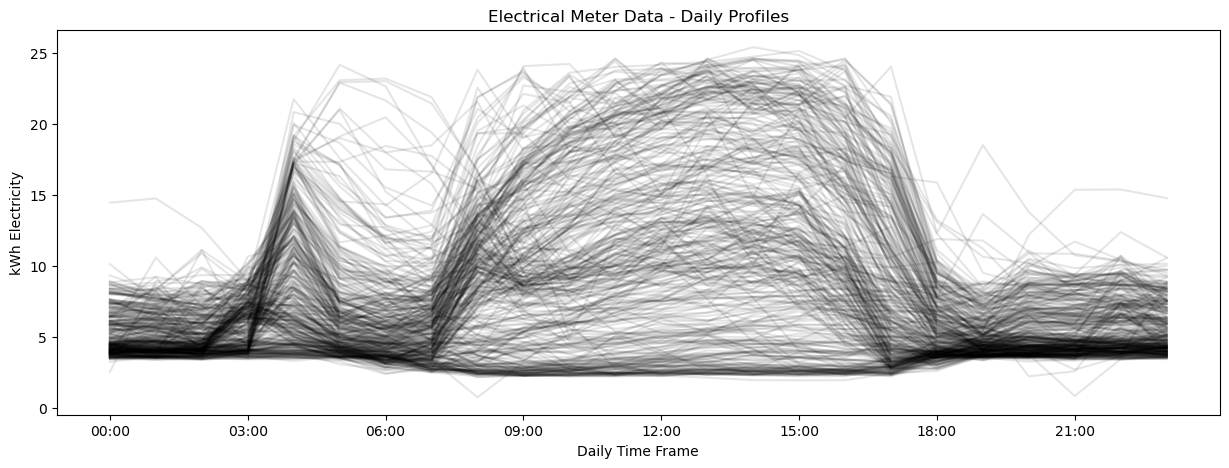

In [224]:
df_pivot.T.plot(legend=False, figsize=(15,5), color='k', alpha=0.1, xticks=np.arange(0, 86400, 10800))
plt.title("Electrical Meter Data - Daily Profiles")
plt.xlabel("Daily Time Frame")
plt.ylabel("kWh Electricity");

Let's look at weekdays first:

In [225]:
test = df.index[0].date()

In [227]:
df['Weekday'] = df.index.map(lambda t: t.date().weekday())

In [228]:
df.head()

Office_Amelia        Date      Time  Weekday
timestamp                                                        
2015-01-01 00:00:00           3.96  2015-01-01  00:00:00        3
2015-01-01 01:00:00           4.44  2015-01-01  01:00:00        3
2015-01-01 02:00:00           4.82  2015-01-01  02:00:00        3
2015-01-01 03:00:00           4.28  2015-01-01  03:00:00        3
2015-01-01 04:00:00          18.79  2015-01-01  04:00:00        3

In [229]:
df_pivot_weekday = pd.pivot_table(df[(df.Weekday < 5)], values='Office_Amelia', index='Date', columns='Time')

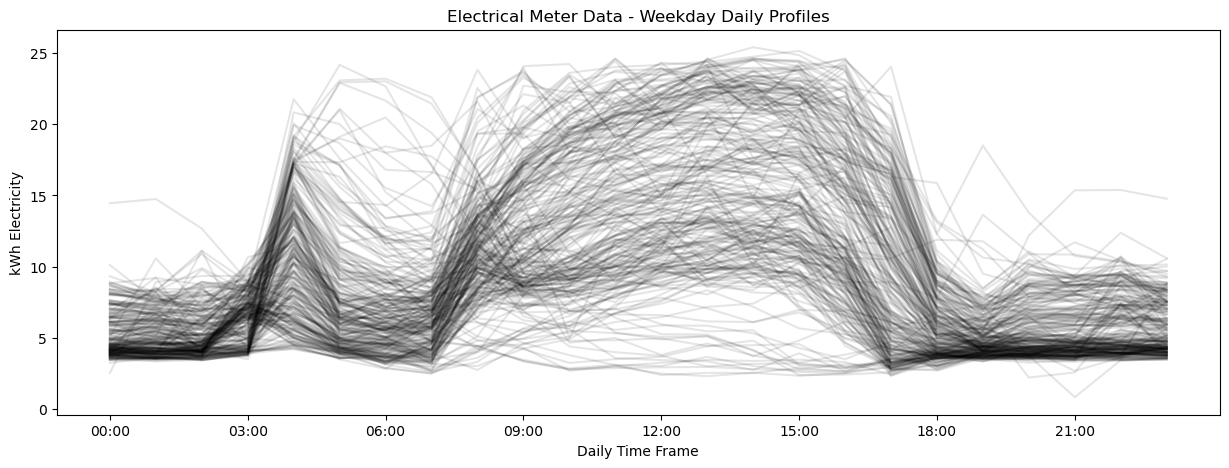

In [230]:
df_pivot_weekday.T.plot(legend=False, figsize=(15,5), color='k', alpha=0.1, xticks=np.arange(0, 86400, 10800))
plt.title("Electrical Meter Data - Weekday Daily Profiles")
plt.xlabel("Daily Time Frame")
plt.ylabel("kWh Electricity");

###  Manual indentification of clusters
There is varying levels of consumption throughout the course of a year. This is probably because of weather effects or schedule changes.

These could be considered "clusters" of behavior due to the course of

Let's try weekend:

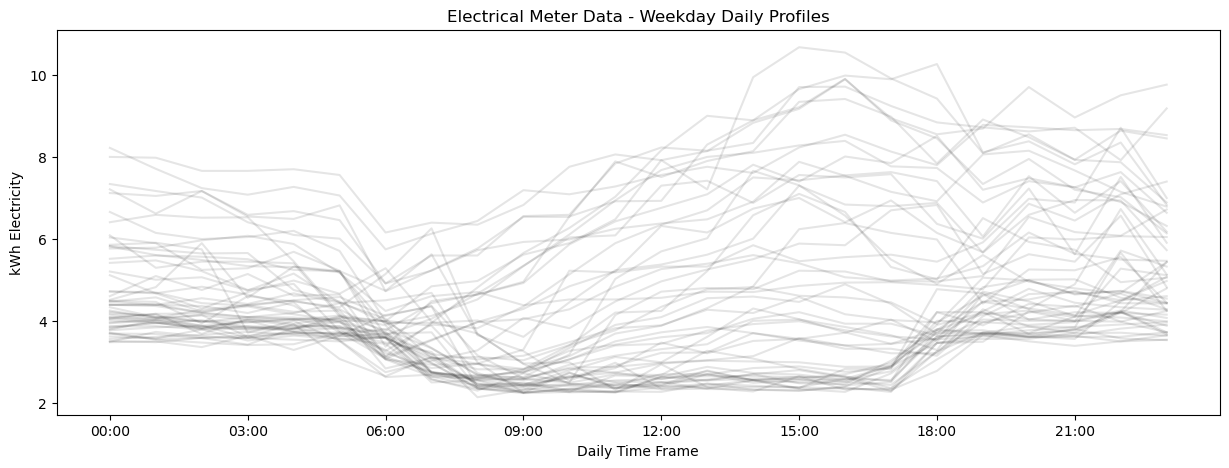

In [232]:
df_pivot_weekend = pd.pivot_table(df[(df.Weekday > 5)], values='Office_Amelia', index='Date', columns='Time')
df_pivot_weekend.T.plot(legend=False, figsize=(15,5), color='k', alpha=0.1, xticks=np.arange(0, 86400, 10800))
plt.title("Electrical Meter Data - Weekday Daily Profiles")
plt.xlabel("Daily Time Frame")
plt.ylabel("kWh Electricity");

### K-means clusdering - daily load profile

In [235]:
df = pd.read_csv('./meter_data/Office_Amelia.csv', index_col = "timestamp", parse_dates=True) 

In [236]:
df_norm = (df - df.mean()) / (df.max() - df.min()) 

df['Time'] = df.index.map(lambda t: t.time())
df['Date'] = df.index.map(lambda t: t.date())
df_norm['Time'] = df_norm.index.map(lambda t: t.time())
df_norm['Date'] = df_norm.index.map(lambda t: t.date())

In [240]:
dailyblocks = pd.pivot_table(df, values='Office_Amelia', index='Date', columns='Time', aggfunc='mean')
dailyblocks_norm = pd.pivot_table(df_norm, values='Office_Amelia', index='Date', columns='Time', aggfunc='mean')

In [241]:
dailyblocksmatrix_norm = np.matrix(dailyblocks_norm.dropna())
centers, _ = kmeans(dailyblocksmatrix_norm, 4, iter=10000)
cluster, _ = vq(dailyblocksmatrix_norm, centers)

In [242]:
clusterdf = pd.DataFrame(cluster, columns=['ClusterNo'])

In [243]:
dailyclusters = pd.concat([dailyblocks.dropna().reset_index(), clusterdf], axis=1) 

In [244]:
dailyclusters.head()

Date  00:00:00  01:00:00  02:00:00  03:00:00  04:00:00  05:00:00  \
0  2015-01-01      3.96      4.44      4.82      4.28     18.79     24.16   
1  2015-01-02      4.55      4.79      4.03      4.71     19.15     23.07   
2  2015-01-03      4.46      4.20      4.14      4.70      4.49      4.20   
3  2015-01-04      4.50      4.47      3.95      4.61      4.48      4.34   
4  2015-01-05      4.06      3.93      4.08      4.66     20.83     20.00   

   06:00:00  07:00:00  08:00:00  ...  15:00:00  16:00:00  17:00:00  18:00:00  \
0     22.65     17.08     12.46  ...      4.82      6.15      5.47      4.97   
1     23.19     21.89     16.67  ...      3.26      3.83      4.47      3.81   
2      5.07      4.88      3.71  ...      2.51      2.72      3.06      4.03   
3      5.15      6.26      3.69  ...      2.39      2.60      2.90      3.47   
4     16.80     16.64     15.47  ...     11.08      8.79      3.27      3.78   

   19:00:00  20:00:00  21:00:00  22:00:00  23:00:00  ClusterNo  
0      5.93      6.46      4.67      4.50      3.98          0  
1      3.58      3.79      4.09      4.22      4.22          0  
2      3.78      3.80      4.17      4.22      4.35          2  
3      3.50      4.24      4.01      3.99      3.73          2  
4      3.56      3.84      4.00      3.79      3.73          0  

[5 rows x 26 columns]

In [245]:
x = dailyclusters.groupby('ClusterNo').mean().sum(axis=1).sort_values()
x = pd.DataFrame(x.reset_index())
x['ClusterNo2'] = x.index
x = x.set_index('ClusterNo')
x = x.drop([0], axis=1)
dailyclusters = dailyclusters.merge(x, how='outer', left_on='ClusterNo', right_index=True)

C:\Users\kamal\AppData\Local\Temp\ipykernel_22356\2680948812.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x = dailyclusters.groupby('ClusterNo').mean().sum(axis=1).sort_values()


In [246]:
dailyclusters = dailyclusters.drop(['ClusterNo'],axis=1)
dailyclusters = dailyclusters.set_index(['ClusterNo2','Date']).T.sort_index()

In [247]:
dailyclusters.head()

ClusterNo2          1                                                         \
Date       2015-01-01 2015-01-02 2015-01-05 2015-01-06 2015-01-07 2015-01-08   
00:00:00         3.96       4.55       4.06       3.25       4.61       4.42   
01:00:00         4.44       4.79       3.93       3.65       4.31       5.01   
02:00:00         4.82       4.03       4.08       4.04       3.98       4.18   
03:00:00         4.28       4.71       4.66       4.20       4.99       5.67   
04:00:00        18.79      19.15      20.83      15.90      13.89       6.63   

ClusterNo2                                              ...          3  \
Date       2015-01-09 2015-01-12 2015-01-13 2015-01-14  ... 2015-09-17   
00:00:00         4.62       4.05       4.59       4.12  ...       4.09   
01:00:00         4.95       4.71       4.60       4.48  ...       4.97   
02:00:00         4.98       4.48       4.71       4.69  ...       6.18   
03:00:00         5.10       7.35       6.75       9.79  ...       5.14   
04:00:00        13.67       9.57       7.78      12.37  ...       9.50   

ClusterNo2                                                                    \
Date       2015-09-21 2015-09-22 2015-09-23 2015-09-24 2015-09-25 2015-09-28   
00:00:00         4.59       5.11       4.71       4.93       5.63       4.57   
01:00:00         4.88      10.58       4.74       5.50       5.72       5.20   
02:00:00         5.75       7.18       4.31       4.44       5.07       4.18   
03:00:00         4.99       4.78       4.26       4.90       5.64       4.68   
04:00:00        19.93      10.67       8.44      10.04      11.30      17.25   

ClusterNo2                                   
Date       2015-09-29 2015-09-30 2015-10-01  
00:00:00         5.60       5.90       4.89  
01:00:00         5.38       5.26       5.56  
02:00:00         4.79       5.20       5.57  
03:00:00         5.36       5.21       4.51  
04:00:00        10.35      10.88       9.69  

[5 rows x 365 columns]

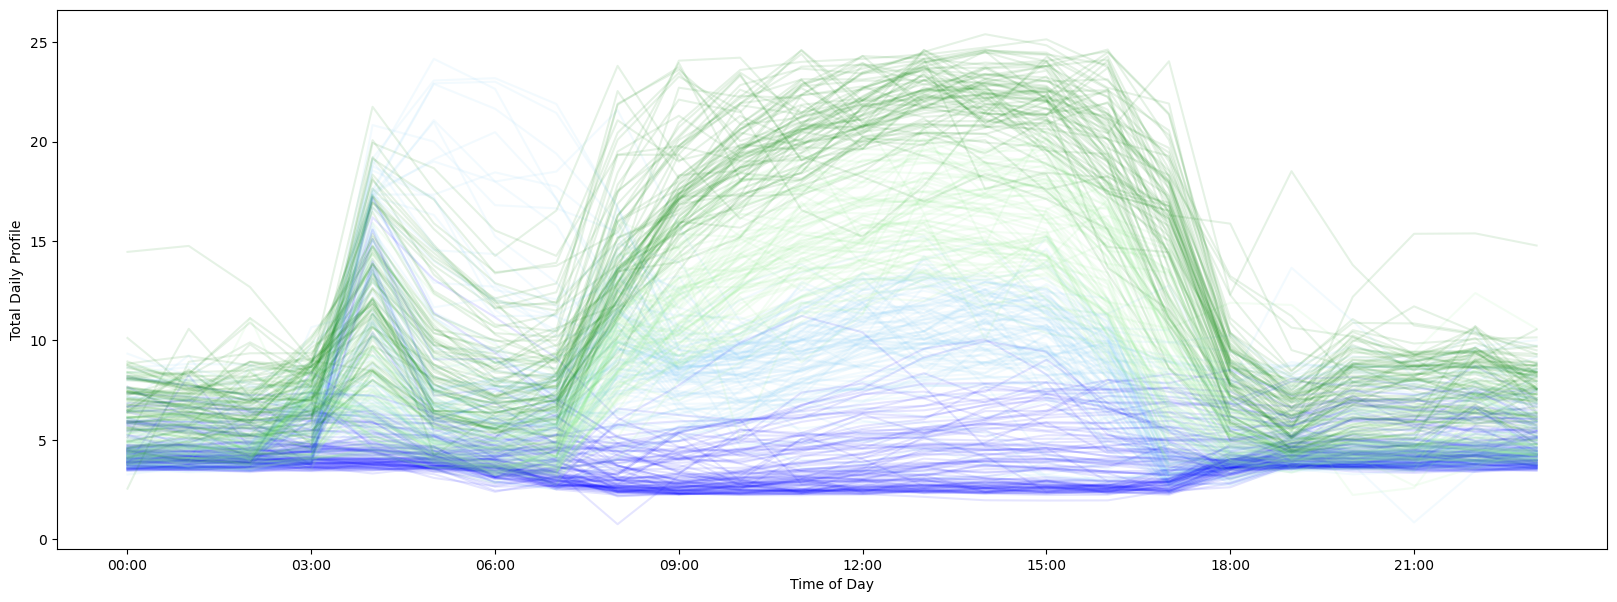

In [250]:
clusterlist = list(dailyclusters.columns.get_level_values(0).unique())
matplotlib.rcParams['figure.figsize'] = 20, 7

styles2 = ['LightSkyBlue', 'b','LightGreen', 'g','LightCoral','r','SandyBrown','Orange','Plum','Purple','Gold','b']
fig, ax = plt.subplots()
for col, style in zip(clusterlist, styles2):
    dailyclusters[col].plot(ax=ax, legend=False, style=style, alpha=0.1, xticks=np.arange(0, 86400, 10800))

ax.set_ylabel('Total Daily Profile')
ax.set_xlabel('Time of Day');

### Aggregate visualizations of the clusters

In [252]:
def timestampcombine(date,time):
    pydatetime = datetime.combine(date, time)
    return pydatetime

In [253]:
def ClusterUnstacker(df):
    df = df.unstack().reset_index()
    df['timestampstring'] = pd.to_datetime(df.Date.astype("str") + " " + df.level_2.astype("str"))
    #pd.to_datetime(df.Date  df.level_2) #map(timestampcombine, )
    df = df.dropna()
    return df

In [254]:
dailyclusters.unstack().reset_index().head()

ClusterNo2        Date   level_2      0
0           1  2015-01-01  00:00:00   3.96
1           1  2015-01-01  01:00:00   4.44
2           1  2015-01-01  02:00:00   4.82
3           1  2015-01-01  03:00:00   4.28
4           1  2015-01-01  04:00:00  18.79

In [255]:
dfclusterunstacked = ClusterUnstacker(dailyclusters)
dfclusterunstackedpivoted = pd.pivot_table(dfclusterunstacked, values=0, index='timestampstring', columns='ClusterNo2')

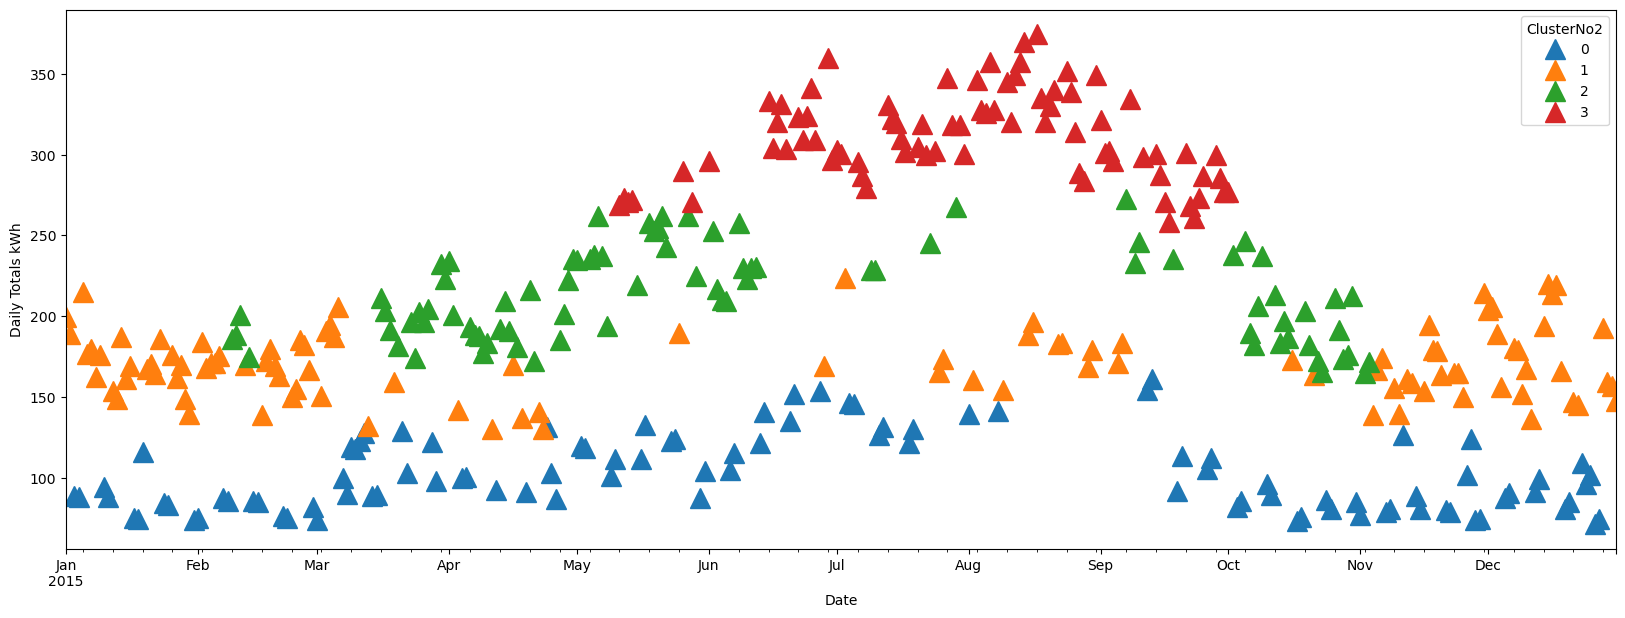

In [256]:
clusteravgplot = dfclusterunstackedpivoted.resample('D').sum().replace(0, np.nan).plot(style="^",markersize=15)
clusteravgplot.set_ylabel('Daily Totals kWh')
clusteravgplot.set_xlabel('Date');